<a href="https://colab.research.google.com/github/swamptoday/colab-files/blob/main/MaCL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
from nltk import DefaultTagger, UnigramTagger, BigramTagger, TrigramTagger
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.corpus import wordnet as wn
from nltk.corpus import treebank
from nltk.corpus import gutenberg
from nltk.corpus import genesis

import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')
nltk.download('wordnet')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Practice 1

## Пакет Numpy в Python

### 1. Створіть два одновимірні масиви Numpy.

In [ ]:
arr1 = np.arange(7, 20, 2)
arr2 = np.array([2.34, 1.23, 5.89, 4.98, 3.6, 7.19, 2.67])

### 2. Використовуючи оператори пакета Numpy, зведіть усі елементи першого масиву в квадрат, потім перемножте елементи першого масиву по-елементно з елементами другого масиву.

In [ ]:
print(arr1)
print(np.power(arr1, 2))
print()
print(arr2)
print(np.multiply(arr1, arr2))

[ 7  9 11 13 15 17 19]
[ 49  81 121 169 225 289 361]

[2.34 1.23 5.89 4.98 3.6  7.19 2.67]
[ 16.38  11.07  64.79  64.74  54.   122.23  50.73]


### 3. Створіть двовимірний масив Numpy, що містить не менше ніж 4 рядки та п'ять стовпців цілих чисел.

In [ ]:
print('First method')
np_2d = np.array([np.arange(1,6), np.arange(6,11), np.arange(11, 16), np.arange(16, 21)])
print(np_2d)
print()

print('Second method')
np_2d = np.arange(20).reshape(4, 5)
print(np_2d)
print()

print('Third method')
np_2d = np.random.randint(0, 10, size=(4, 5))
print(np_2d)

First method
[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]]

Second method
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]

Third method
[[5 8 7 7 2]
 [3 1 5 8 2]
 [6 3 9 2 4]
 [1 1 4 1 4]]


4. У кожному стовпчику значення другого рядка замініть на 0.

In [ ]:
np_2d[1, :] = 0
print(np_2d)

[[5 8 7 7 2]
 [0 0 0 0 0]
 [6 3 9 2 4]
 [1 1 4 1 4]]


### 5. Змініть форму масиву, змінивши число рядків на число стовпців і навпаки.

In [ ]:
print(np_2d.reshape(5,4))

[[5 8 7 7]
 [2 0 0 0]
 [0 0 6 3]
 [9 2 4 1]
 [1 4 1 4]]


### 6. Використовуючи значення сайту http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_MLB_HeightsWeights створіть два Numpy масиву, що містять зріст та вагу будь-яких 10 гравців Major League Baseball Players.

In [ ]:
mlbp_height = np.array([74, 74, 72, 72, 73, 69, 69, 71, 76, 71])
mlbp_weight = np.array([180, 215, 210, 210, 188, 176, 209, 200, 231, 180])

### 7. Переведіть зріст у метри, а вагу в кілограми та порахуйте індекс маси тіла для кожного баскетболіста.

In [ ]:
mlbp_height_m = mlbp_height * 0.0254
print(np.round(mlbp_height_m, 2))

mlbp_weight_kg = mlbp_weight * 0.45359237
print(np.round(mlbp_weight_kg, 2))

print()

bmi = mlbp_weight_kg / np.power(mlbp_height_m, 2)
print(f'bmi: {np.round(bmi, 2)}')


[1.88 1.88 1.83 1.83 1.85 1.75 1.75 1.8  1.93 1.8 ]
[ 81.65  97.52  95.25  95.25  85.28  79.83  94.8   90.72 104.78  81.65]

bmi: [23.11 27.6  28.48 28.48 24.8  25.99 30.86 27.89 28.12 25.1 ]


### 8. Виведіть масив, до якого включено значення bmi<21.

In [ ]:
print(bmi < 21)
print(bmi[bmi < 21])

[False False False False False False False False False False]
[]


## Робота з багатовимірними масивами пакета Numpy

### 1. Використовуючи інформацію сайту http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_MLB_HeightsWeights створіть двомірний Numpy масив, що містить інформацію про зріст, вагу та вік 20 будь-яких баскетболістів Major League Baseball Players.

In [ ]:
mlbp_age = np.array([22.99, 34.69, 30.78, 35.43, 35.71, 29.39, 30.77, 35.07, 30.19, 27.05, 23.88, 26.96, 23.29, 26.11, 27.55, 34.27, 30, 27.99, 22.38, 22.89])
mlbp_weight = np.array([180, 215, 210, 210, 188, 176, 209, 200, 231, 180, 188, 180, 185, 160, 180, 185, 197, 189, 185, 219])
mlbp_height = np.array([74, 74, 72, 72, 73, 69, 69, 71, 76, 71, 73, 73, 74, 74, 69, 70, 72, 73, 75, 78])

mlbp_measure = np.array([mlbp_age, mlbp_weight * 0.45359237, mlbp_height * 0.0254])
print(np.round(mlbp_measure, 2))

[[ 22.99  34.69  30.78  35.43  35.71  29.39  30.77  35.07  30.19  27.05
   23.88  26.96  23.29  26.11  27.55  34.27  30.    27.99  22.38  22.89]
 [ 81.65  97.52  95.25  95.25  85.28  79.83  94.8   90.72 104.78  81.65
   85.28  81.65  83.91  72.57  81.65  83.91  89.36  85.73  83.91  99.34]
 [  1.88   1.88   1.83   1.83   1.85   1.75   1.75   1.8    1.93   1.8
    1.85   1.85   1.88   1.88   1.75   1.78   1.83   1.85   1.9    1.98]]


### 2. Вивести на екран інформацію про четвертого гравця даного масиву.

In [ ]:
print('Information together')
print(mlbp_measure[:, 3])
print()

print('Age')
print(mlbp_measure[0, 3])
print()

print('Weight')
print(mlbp_measure[1, 3])
print()

print('Height')
print(mlbp_measure[2, 3])

Information together
[35.43      95.2543977  1.8288   ]

Age
35.43

Weight
95.2543977

Height
1.8288


### 3. Вивести на екран інформацію про вагу всіх гравців.

In [ ]:
for weight in mlbp_measure[1, :]:
  print(np.round(weight, 2))

81.65
97.52
95.25
95.25
85.28
79.83
94.8
90.72
104.78
81.65
85.28
81.65
83.91
72.57
81.65
83.91
89.36
85.73
83.91
99.34


### 4. Порівняти індекс маси тіла четвертого гравця і шостого гравця та вивести відповідне повідомлення (“Індекс маси тіла четвертого гравця більше за індекс маси тіла шостого гравця” або “Індекс маси тіла шостого гравця більше за індекс маси четвертого гравця”).

In [ ]:
bmi = mlbp_measure[1, :] / np.power(mlbp_measure[2, :], 2)
if (bmi[3] < bmi[5]):
  print('Індекс маси тіла шостого гравця більше за індекс маси четвертого гравця')
else:
  print('Індекс маси тіла четвертого гравця більше за індекс маси тіла шостого гравця')

Індекс маси тіла четвертого гравця більше за індекс маси тіла шостого гравця


### 5. Вивести на екран список, висоту і вагу другого і третього гравця одночасно.

In [ ]:
for i in [1, 2]:
  print(mlbp_measure[[1,2], i])

[97.52235955  1.8796    ]
[95.2543977  1.8288   ]


### 6. Визначити розмірність, число елементів та тип елементів масиву (властивість dtype).

In [ ]:
print(f'Розмірність: {mlbp_measure.ndim}')
print(f'Число елементів: {mlbp_measure.shape[0] * mlbp_measure.shape[1]}')
print(f'Тип елементів: {mlbp_measure.dtype}')

Розмірність: 2
Число елементів: 60
Тип елементів: float64


### 7. Створіть масив, що містить два рядки та дев'ять стовпців, заповнивши його довільними речовими числами.

In [ ]:
arr = np.random.rand(2,9)
print(arr)

[[0.43593833 0.1099299  0.71434148 0.42094329 0.92093564 0.36609356
  0.02856111 0.10078357 0.56755805]
 [0.91771518 0.02275093 0.55405178 0.04605422 0.45345666 0.51031017
  0.67365639 0.47073185 0.81614515]]


### 8. Заповніть масиви a1, b2, c3, d4, що складаються з чотирьох рядків і трьох стовпців, довільними значеннями, використовуючи рівномірний розподіл (a1), нормальний розподіл (b2), стандартний нормальний розподіл (c3) та розподіл Ципфа (d4).

In [ ]:
a1 = np.random.uniform(3, 5, (4, 3))
print(f'Рівномірний розподіл: {a1}')
print()

b2 = np.random.normal(6, 8, (4, 3))
print(f'Нормальний розподіл: {b2}')
print()

c3 = np.random.standard_normal((4, 3))
print(f'Стандартний нормальний розподіл: {c3}')
print()

d4 = np.random.zipf(4, (4, 3))
print(f'Розподіл Ципфа: {d4}')


Рівномірний розподіл: [[3.80130908 3.18594558 4.70633579]
 [4.33552242 3.70761077 4.36146278]
 [4.18448967 3.09103078 3.93946679]
 [3.22960791 3.24080612 3.95044549]]

Нормальний розподіл: [[ 8.39356538  1.24187918  3.72491487]
 [11.64256885 -5.73263823  1.84902421]
 [ 0.71541597 18.74348053  3.27512354]
 [ 9.09287929 -7.44350723 16.0277748 ]]

Стандартний нормальний розподіл: [[-0.25709046 -1.07511339 -1.77608731]
 [-1.08162007 -1.79259299  1.17799391]
 [ 1.59685573 -2.49994217  0.62452799]
 [ 1.12533674  2.26700021  0.46515591]]

Розподіл Ципфа: [[1 1 1]
 [1 2 1]
 [1 1 1]
 [1 1 1]]


### 9. Округліть значення елементів масиву b2 до двох символів після коми.

In [ ]:
b2_r = np.round(b2, 2)
print(b2_r)

[[ 8.39  1.24  3.72]
 [11.64 -5.73  1.85]
 [ 0.72 18.74  3.28]
 [ 9.09 -7.44 16.03]]


### 10. Визначити мінімальне, максимальне значення елементів отриманого масиву.

In [ ]:
print(f'Min: {b2_r.min()}')
print(f'Max: {b2_r.max()}')

Min: -7.44
Max: 18.74


### 11. Визначте середнє значення другого рядка та останнього стовпця масиву.

In [ ]:
print(f'Mean of 2 row: {b2_r[1, :].mean()}')
print(f'Mean of last column: {b2_r[:, -1].mean()}')

Mean of 2 row: 2.5866666666666664
Mean of last column: 6.220000000000001


### 12. Округлити значення елементів масиву a1 за допомогою функцій fix() та rint(). Як ви вважаєте, через що отримали різницю результатів округлення?

In [ ]:
print(a1)
print()

# Округлює до найближчого цілого
print('Rint:')
print(np.rint(a1))
print()

# Округлює до найближчого цілого в напрямку нуля
print('Fix:')
print(np.fix(a1))

[[3.80130908 3.18594558 4.70633579]
 [4.33552242 3.70761077 4.36146278]
 [4.18448967 3.09103078 3.93946679]
 [3.22960791 3.24080612 3.95044549]]

Rint:
[[4. 3. 5.]
 [4. 4. 4.]
 [4. 3. 4.]
 [3. 3. 4.]]

Fix:
[[3. 3. 4.]
 [4. 3. 4.]
 [4. 3. 3.]
 [3. 3. 3.]]


### 13. Згенеруйте двовимірний масив цілих чисел у проміжку від 100 тисяч до мільйона.

In [ ]:
arr_2d = np.random.randint(100000, 1000000000, (2, 3))

print(arr_2d)

[[663551435 466731540 437876641]
 [761538663 437284617 510463892]]


### 14. Округліть значення масиву до тисячі.

In [ ]:
np.round(arr_2d, -3)

array([[663551000, 466732000, 437877000],
       [761539000, 437285000, 510464000]])

# Practice 2

## Реалізувати все приклади, які наведені у лабораторній роботі на своїх довільних текстах. Тексти можна брати з бібліотеки nltk.

### Приклад 1. Функції роботи з рядками у Python

In [ ]:
nltk.download('gutenberg')
nltk.download('genesis')
nltk.download('inaugural')
nltk.download('nps_chat')
nltk.download('webtext')
nltk.download('treebank')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('wordnet')

from nltk.book import *

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package genesis to /root/nltk_data...
[nltk_data]   Package genesis is already up-to-date!
[nltk_data] Downloading package inaugural to /root/nltk_data...
[nltk_data]   Package inaugural is already up-to-date!
[nltk_data] Downloading package nps_chat to /root/nltk_data...
[nltk_data]   Package nps_chat is already up-to-date!
[nltk_data] Downloading package webtext to /root/nltk_data...
[nltk_data]   Package webtext is already up-to-date!
[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Package treebank is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_

In [ ]:
# creating array with 4 elements-arrays, that consists of 50 token sentences each

sent_size = 5
sent = [text2[i:i+sent_size] for i in range(0, len(text2), sent_size)]

In [ ]:
print ('Виведемо поєднання двох масивів')
print (sent[0] + sent[1])
print ('Виведемо поєднання трьох масивів')
print (sent[3] + sent[0] + sent[1])
sent[0].append("Author's")
print ('Додамо до масиву ще один елемент')
print (sent[0])

Виведемо поєднання двох масивів
['[', 'Sense', 'and', 'Sensibility', 'by', 'Jane', 'Austen', '1811', ']', 'CHAPTER']
Виведемо поєднання трьох масивів
['had', 'long', 'been', 'settled', 'in', '[', 'Sense', 'and', 'Sensibility', 'by', 'Jane', 'Austen', '1811', ']', 'CHAPTER']
Додамо до масиву ще один елемент
['[', 'Sense', 'and', 'Sensibility', 'by', "Author's"]


In [ ]:
print(sent[2])
print ('Виведемо елемент колекції під індексом 3')
print (sent[2][3])
print ('Знайдемо індекс елемента зі значенням The')
print (sent[2].index('The'))

['1', 'The', 'family', 'of', 'Dashwood']
Виведемо елемент колекції під індексом 3
of
Знайдемо індекс елемента зі значенням The
1


In [ ]:
print(sent[1])
print ('Виведемо елементи колекції ')
print (sent[1][1:4])

['Jane', 'Austen', '1811', ']', 'CHAPTER']
Виведемо елементи колекції 
['Austen', '1811', ']']


In [ ]:
print(sent[3])
print ('Відсортуємо колекцію ')
print (sorted(sent[3]))

['had', 'long', 'been', 'settled', 'in']
Відсортуємо колекцію 
['been', 'had', 'in', 'long', 'settled']


In [ ]:
s =' '.join(sent[3])
print (s)
print (s.split())

had long been settled in
['had', 'long', 'been', 'settled', 'in']


In [ ]:
fdist1 = FreqDist(text4)
vocab = list(fdist1.keys())
print (vocab[300:320])
print (f"Frequency of 'return': {fdist1['return']}")

['return', 'pious', 'gratitude', 'along', 'humble', 'anticipation', 'future', 'blessings', 'past', 'seem', 'presage', 'These', 'reflections', 'arising', 'out', 'crisis', 'forced', 'strongly', 'mind', 'suppressed']
Frequency of 'return': 25


In [ ]:
def addlabels(x, y):
    for i in range(len(x)):
        axes.text(i, y[i], round(y[i], 2), ha='center')

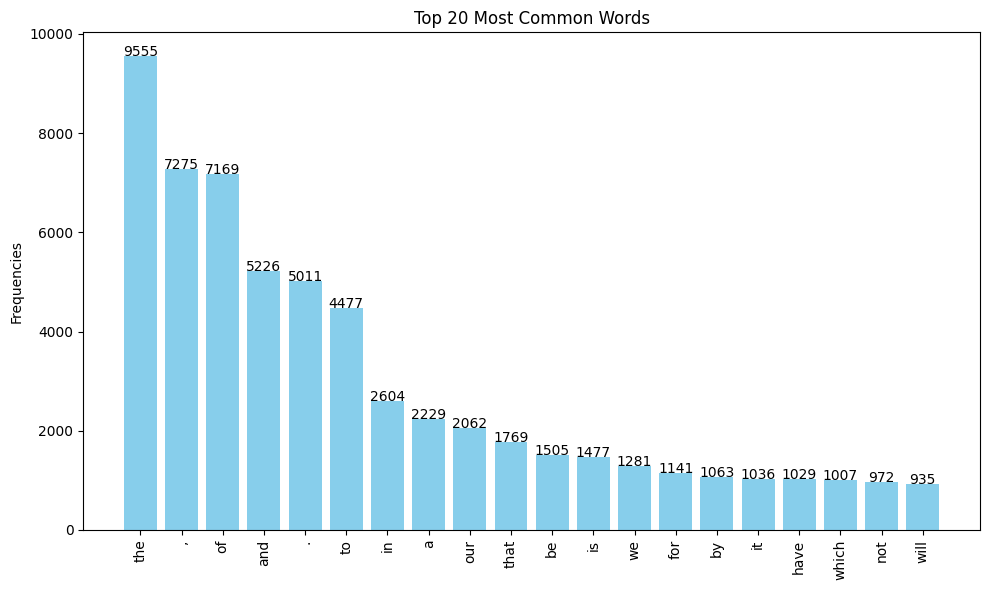

In [ ]:
top_20 = fdist1.most_common(20)
words, frequencies = zip(*top_20)

fig, axes = plt.subplots(1, 1, figsize=(10, 6))  # Adjust figsize as needed

axes.bar(range(len(words)), frequencies, tick_label=words, color='skyblue')
axes.set_xticklabels(words, rotation=90)  # Set the rotation for tick labels
addlabels(range(len(words)), frequencies )
axes.set_ylabel('Frequencies')
axes.set_title('Top 20 Most Common Words')

plt.tight_layout()
plt.show()

In [ ]:
sent_to_search = sent[0]
print (sent_to_search)

long_words = [w for w in sent_to_search if len(w) >= 8]
print(long_words)

words_with_y = [w for w in sent_to_search if ('y' in w)]
print(words_with_y)

['[', 'Sense', 'and', 'Sensibility', 'by', "Author's"]
['Sensibility', "Author's"]
['Sensibility', 'by']


### Приклад 2. Функція bigrams

In [ ]:
print(sent[3])
print (list(bigrams(sent[3])))

['had', 'long', 'been', 'settled', 'in']
[('had', 'long'), ('long', 'been'), ('been', 'settled'), ('settled', 'in')]


### Приклад 3. Функція collocations()

In [ ]:
print (text9.collocations())

said Syme; asked Syme; Saffron Park; Comrade Gregory; Leicester
Square; Colonel Ducroix; red hair; old gentleman; could see; Inspector
Ratcliffe; Anarchist Council; blue card; Scotland Yard; dark room;
blue eyes; common sense; straw hat; hundred yards; said Gregory; run
away
None


### Приклад 4. Використання Стеммер Портера і Ланкастера

In [ ]:
text = "Natural language processing (NLP) is a subfield of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human language, in particular how to program computers to process and analyze large amounts of natural language data."

text_for_stem = ' '.join(text2[50:150])


tokens = word_tokenize(text_for_stem)
# print(tokens)
porter = nltk.PorterStemmer()
lancaster = nltk.LancasterStemmer()

stem_check = [(t, porter.stem(t), lancaster.stem(t)) for t in tokens[:20]]

for i in stem_check:
    print(i)

('lived', 'live', 'liv')
('in', 'in', 'in')
('so', 'so', 'so')
('respectable', 'respect', 'respect')
('a', 'a', 'a')
('manner', 'manner', 'man')
('as', 'as', 'as')
('to', 'to', 'to')
('engage', 'engag', 'eng')
('the', 'the', 'the')
('general', 'gener', 'gen')
('good', 'good', 'good')
('opinion', 'opinion', 'opin')
('of', 'of', 'of')
('their', 'their', 'their')
('surrounding', 'surround', 'surround')
('acquaintance', 'acquaint', 'acquaint')
('.', '.', '.')
('The', 'the', 'the')
('late', 'late', 'lat')


### Приклад 5. Застосування лематизатора WordNet для лематизації тексту

In [ ]:
text_to_lemma = "The quick brown foxes are jumping over the lazy dogs. They seem to enjoy their playful antics in the bright sunshine. Birds chirp melodiously as they flit from branch to branch, adding to the picturesque scene. The rustling leaves create a soothing rhythm in the gentle breeze, inviting a sense of calmness to the surroundings. Meanwhile, nearby squirrels scurry about, gathering nuts for the upcoming winter months. Nature's symphony plays out harmoniously, painting a serene portrait of life in the wilderness"

tokens = word_tokenize(text_to_lemma)
wnl = nltk.WordNetLemmatizer()

lemmatized = [(t, wnl.lemmatize(t)) for t in tokens]

for i in lemmatized:
    if (i[0] != i[1]):
        print(i)

('foxes', 'fox')
('dogs', 'dog')
('antics', 'antic')
('as', 'a')
('leaves', 'leaf')
('squirrels', 'squirrel')
('nuts', 'nut')
('months', 'month')
('plays', 'play')


### Приклад 6. Використання книг з бібліотеки

In [ ]:
texts = [text1, text2, text3, text4]
for i, j, z in zip(range(0, 80, 20), range(20, 100, 20), range(0, 5)):
    print(f'Text {z+1}: tokens from {i} to {j}:')
    print(texts[z][i:j])

Text 1: tokens from 0 to 20:
['[', 'Moby', 'Dick', 'by', 'Herman', 'Melville', '1851', ']', 'ETYMOLOGY', '.', '(', 'Supplied', 'by', 'a', 'Late', 'Consumptive', 'Usher', 'to', 'a', 'Grammar']
Text 2: tokens from 20 to 40:
['Sussex', '.', 'Their', 'estate', 'was', 'large', ',', 'and', 'their', 'residence', 'was', 'at', 'Norland', 'Park', ',', 'in', 'the', 'centre', 'of', 'their']
Text 3: tokens from 40 to 60:
['of', 'the', 'waters', '.', 'And', 'God', 'said', ',', 'Let', 'there', 'be', 'light', ':', 'and', 'there', 'was', 'light', '.', 'And', 'God']
Text 4: tokens from 60 to 80:
['my', 'Country', ',', 'whose', 'voice', 'I', 'can', 'never', 'hear', 'but', 'with', 'veneration', 'and', 'love', ',', 'from', 'a', 'retreat', 'which', 'I']


### Приклад 7. Пошук в текстах

In [ ]:
print(text1)
print(list(text1.vocab().keys())[200:210])

print(text1.concordance('authentic', 50, 10))

<Text: Moby Dick by Herman Melville 1851>
['statements', 'however', 'authentic', 'these', 'extracts', 'veritable', 'gospel', 'cetology', 'Far', 'As']
Displaying 3 of 3 matches:
tatements , however authentic , in these extracts
lar onset , but the authentic particulars of this
st , got one of his authentic abortions ; that is
None


### Приклад 8. Визначимо, які ще слова зустрічаються в одному контексті разом зі  словом monstrous за допомогою функції similar

In [ ]:
print (text1)
print (text2)
print('Similar context with bones in text1:')
print (text1.similar("bones"))
print('\nSimilar context with bones in text2:')
print (text2.similar("bones"))

print('\nCommon contexts between bones and one in text1:')
print (text1.common_contexts(["bones", "one"]))

<Text: Moby Dick by Herman Melville 1851>
<Text: Sense and Sensibility by Jane Austen 1811>
Similar context with bones in text1:
one eyes back ship place cabin to it hand which whales land life men
work side way stern head feet
None

Similar context with bones in text2:
gentleman degree one other sale desire mark thing addition notice
offence opportunity act imprudence instance wish idea part symptom
doubt
None

Common contexts between bones and one in text1:
had_of and_after with_of
None


### Приклад 9. Візуалізація розподілу слів за текстами

['In', 'the', 'beginning', 'God', 'created', 'the', 'heaven', 'and', 'the', 'earth', '.', 'And', 'the', 'earth', 'was', 'without', 'form', ',', 'and', 'void', ';', 'and', 'darkness', 'was', 'upon', 'the', 'face', 'of', 'the', 'deep', '.', 'And', 'the', 'Spirit', 'of', 'God', 'moved', 'upon', 'the', 'face', 'of', 'the', 'waters', '.', 'And', 'God', 'said', ',', 'Let', 'there', 'be', 'light', ':', 'and', 'there', 'was', 'light', '.', 'And', 'God', 'saw', 'the', 'light', ',', 'that', 'it', 'was', 'good', ':', 'and', 'God', 'divided', 'the', 'light', 'from', 'the', 'darkness', '.', 'And', 'God', 'called', 'the', 'light', 'Day', ',', 'and', 'the', 'darkness', 'he', 'called', 'Night', '.', 'And', 'the', 'evening', 'and', 'the', 'morning', 'were', 'the']


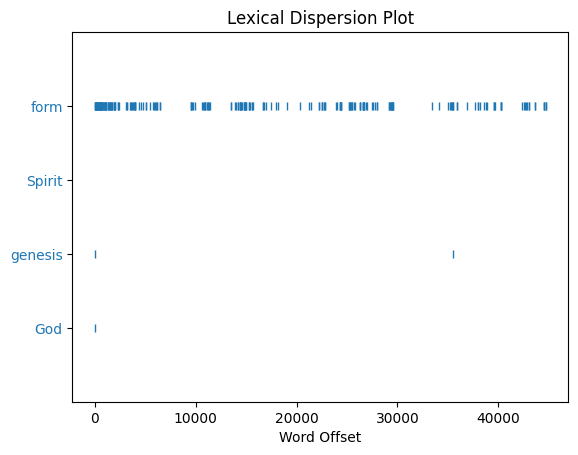

In [ ]:
print(text3[0:100])

text3.dispersion_plot(["God", "genesis", "Spirit", "form"])

### Приклад 10. Визначення довжини тексту (кількість символів у тексті)

In [ ]:
len4 = (len(text4))
len3 = (len(text3))

if (len4 > len3):
    print(f'Text 4: {text4} has bigger length than text 3 {text3}')
else:
    print(f'Text 3: {text3} has bigger length than text 4 {text4}')


Text 4: <Text: Inaugural Address Corpus> has bigger length than text 3 <Text: The Book of Genesis>


### Приклад 11. Виділення всіх токенов, які зустрічаються в тексті, без повторень,  а потім їх сортування за алфавітом

In [ ]:
t9_sortedset = sorted(set(text9))
# print (t3)
print(f'Length of original text 9 {text9}: {len(text9)}')
print (f'Length of original sorted tokens of text 9: {len(t9_sortedset)}')
print (f'Length of text 9 is in {np.round(len(text9) / len(set(text9)), 2)} times bigger that length of its unique tokens')


Length of original text 9 <Text: The Man Who Was Thursday by G . K . Chesterton 1908>: 69213
Length of original sorted tokens of text 9: 6807
Length of text 9 is in 10.17 times bigger that length of its unique tokens


### Приклад 12. Визначення частоти появи токена в тексті (скільки разів токен  зустрівся в тексті)

In [ ]:
word = 'captain'

print (f'Getting amount of times {word} was mentioned using count: {text1.count("captain")}')
fdict = FreqDist(text1)
print (f'Getting amount of times {word} was mentioned using FreqDict: {fdict["captain"]}')

Getting amount of times captain was mentioned using count: 112
Getting amount of times captain was mentioned using FreqDict: 112


### Приклад 13. Визначення з якою ймовірністю токен зустрівся в тексті

In [ ]:
def percentage(count, total):
 return 100 * count / total

In [ ]:
print(f'Probability using percentage func: {percentage(text1.count(word), len(text1))}')

print(f'Probability using FreqDict: {100 * fdict[word]/len(text1)}')

Probability using percentage func: 0.04294165685782094
Probability using FreqDict: 0.04294165685782094


## Взяти довільний текст на англійській мові, не менше 50 слів без пробілів. Застосувати для цього тексту алгоритм Портера, Ланкастера і WordNet лематизатор.

In [ ]:
hp_and_the_prisoner_of_azkaban = 'Harry Potter was a highly unusual boy in many ways. For one thing, he hated the summer holidays more than any other time of year. For another, he really wanted to do his homework, but was forced to do it in secret, in the dead of night.'

tokens = word_tokenize(hp_and_the_prisoner_of_azkaban)

print(len(tokens))

54


In [ ]:
# Porter stemmer
porter = nltk.PorterStemmer()

stem_check = [(t, porter.stem(t)) for t in tokens]

for i in stem_check:
    if (i[0] != i[1]):
        print(i)


('Harry', 'harri')
('Potter', 'potter')
('was', 'wa')
('highly', 'highli')
('unusual', 'unusu')
('many', 'mani')
('ways', 'way')
('For', 'for')
('hated', 'hate')
('holidays', 'holiday')
('any', 'ani')
('For', 'for')
('another', 'anoth')
('really', 'realli')
('wanted', 'want')
('his', 'hi')
('was', 'wa')
('forced', 'forc')


In [ ]:
# Lancaster stemmer

lancaster = nltk.LancasterStemmer()

stem_check = [(t, lancaster.stem(t)) for t in tokens]

for i in stem_check:
    if (i[0] != i[1]):
        print(i)


('Harry', 'harry')
('Potter', 'pot')
('highly', 'high')
('unusual', 'unus')
('ways', 'way')
('For', 'for')
('one', 'on')
('hated', 'hat')
('summer', 'sum')
('holidays', 'holiday')
('more', 'mor')
('other', 'oth')
('time', 'tim')
('For', 'for')
('another', 'anoth')
('really', 'real')
('wanted', 'want')
('forced', 'forc')


In [ ]:
# WordNet

wnl = nltk.WordNetLemmatizer()

lemmatized = [(t, wnl.lemmatize(t)) for t in tokens]

for i in lemmatized:
    if (i[0] != i[1]):
        print(i)

('was', 'wa')
('ways', 'way')
('holidays', 'holiday')
('was', 'wa')


## Для лематизатора WordNet розрахувати точність роботи. Точність розраховувати за формулою: де P – це кількість правильно перетворених слів, а N – загальна кількість слів.


In [ ]:
correct_dict = {'was': 'be', 'hated': 'hate', 'ways': 'way', 'holidays': 'holiday', 'wanted': 'want', 'forced': 'force'}

P = 0
N = len(lemmatized)


for token, lemma in lemmatized:
    if token not in correct_dict or lemma == correct_dict[token]:
        P += 1

accuracy = P / N * 100
print("Accuracy:", accuracy, "%")

Accuracy: 90.74074074074075 %


# Practice 3

## Part 1

### 1. Встановіть пакет nltk та “book collection” NLTK-Data.

In [ ]:
import nltk
from nltk.book import *

### 2. Перегляньте назви книг встановлених корпусів.

In [ ]:
print(nltk.corpus.gutenberg.fileids())

['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


### 3. Виведіть на екран назву третього та четвертого тексту з “book collection” NLTK-Data

In [ ]:
print(text3.name)
print(text4.name)

The Book of Genesis
Inaugural Address Corpus


### 4. Створіть текстовий файл, який містить текст:
With a solid plan and time for revision, most writing tasks can be completed with ease? This course is for those interested in improving their professional writing. Learn how to improve your writing’s organization, logic, and style so that whatever kind of writing your work requires, you can get your point [across] eloquently and quickly! This COURSE : will delve into the mechanics of the writing process: identifying an audience, choosing the best structure, and revising early drafts of your work. You will build confidence as you practice planning documents; using [organizational] [strategies] such headings and subheadings, and finding misused words and proofreading errors.

In [ ]:
text = """With a solid plan and time for revision, most writing tasks can be completed with ease? This course is for those interested in improving their professional writing. Learn how to improve your writing’s organization, logic, and style so that whatever kind of writing your work requires, you can get your point [across] eloquently and quickly! This COURSE : will delve into the mechanics of the writing process: identifying an audience, choosing the best structure, and revising early drafts of your work. You will build confidence as you practice planning documents; using [organizational] [strategies] such headings and subheadings, and finding misused words and proofreading errors."""

with open("task4.txt", "w", encoding="utf-8") as file:
    file.write(text)

print("Текст успішно записано у файл writing_course.txt")

Текст успішно записано у файл writing_course.txt


### 5. Розділіть текст на речення.

In [ ]:
# Зчитування тексту з файлу
with open("task4.txt", "r", encoding="utf-8") as file:
    text = file.read()

# Використання бібліотеки NLTK для розділення тексту на речення
sentences = nltk.sent_tokenize(text)

for i, sent in enumerate(sentences):
  print(f'Sentence {i + 1}: {sent}')

Sentence 1: With a solid plan and time for revision, most writing tasks can be completed with ease?
Sentence 2: This course is for those interested in improving their professional writing.
Sentence 3: Learn how to improve your writing’s organization, logic, and style so that whatever kind of writing your work requires, you can get your point [across] eloquently and quickly!
Sentence 4: This COURSE : will delve into the mechanics of the writing process: identifying an audience, choosing the best structure, and revising early drafts of your work.
Sentence 5: You will build confidence as you practice planning documents; using [organizational] [strategies] such headings and subheadings, and finding misused words and proofreading errors.


### 6. Розділіть на токени друге та третє речення.

In [ ]:
sent2_tokenized = word_tokenize(sentences[1])
sent3_tokenized = word_tokenize(sentences[2])
print(sent2_tokenized)
print(sent3_tokenized)

['This', 'course', 'is', 'for', 'those', 'interested', 'in', 'improving', 'their', 'professional', 'writing', '.']
['Learn', 'how', 'to', 'improve', 'your', 'writing', '’', 's', 'organization', ',', 'logic', ',', 'and', 'style', 'so', 'that', 'whatever', 'kind', 'of', 'writing', 'your', 'work', 'requires', ',', 'you', 'can', 'get', 'your', 'point', '[', 'across', ']', 'eloquently', 'and', 'quickly', '!']


### 7. Створіть словник унікальних слів тексту.

In [ ]:
with open("task4.txt", "r", encoding="utf-8") as file:
    text = file.read()

words = word_tokenize(text)

unique_words = set(words)
print(sorted(unique_words))

['!', ',', '.', ':', ';', '?', 'COURSE', 'Learn', 'This', 'With', 'You', '[', ']', 'a', 'across', 'an', 'and', 'as', 'audience', 'be', 'best', 'build', 'can', 'choosing', 'completed', 'confidence', 'course', 'delve', 'documents', 'drafts', 'early', 'ease', 'eloquently', 'errors', 'finding', 'for', 'get', 'headings', 'how', 'identifying', 'improve', 'improving', 'in', 'interested', 'into', 'is', 'kind', 'logic', 'mechanics', 'misused', 'most', 'of', 'organization', 'organizational', 'plan', 'planning', 'point', 'practice', 'process', 'professional', 'proofreading', 'quickly', 'requires', 'revising', 'revision', 's', 'so', 'solid', 'strategies', 'structure', 'style', 'subheadings', 'such', 'tasks', 'that', 'the', 'their', 'those', 'time', 'to', 'using', 'whatever', 'will', 'with', 'words', 'work', 'writing', 'you', 'your', '’']


### 8. За допомогою створеного регулярного виразу знайдіть перший підрядок, написаний у дужках. Виведіть його на екран.

In [ ]:
import re

# Зчитування тексту з файлу
with open("task4.txt", "r", encoding="utf-8") as file:
    text = file.read()

# Пошук першого підрядка, написаного у дужках, за допомогою регулярного виразу
match = re.search(r'\[(.*?)\]', text)

# Виведення знайденого підрядка на екран
if match:
    print("Перший підрядок, написаний у дужках:", match.group(1))
else:
    print("Дужок у тексті не знайдено")

Перший підрядок, написаний у дужках: across


### 9. У четвертому реченні знайдіть і виведіть на екран підрядок, записаний ве-ликими літерами і пробілами, після яких стоїть двокрапка.

In [ ]:
# Пошук першого підрядка, написаного у дужках, за допомогою регулярного виразу
match = re.search(r'([A-Z\s]+:)', sentences[3])

# Виведення знайденого підрядка на екран
if match:
    print("Підрядок з великими літерами та двокракою:", match.group(1))
else:
    print("Підрядка не знайдено")

Підрядок з великими літерами та двокракою:  COURSE :


## Part 2

### 1. Зчитати найбільш сподобавшийся текст з корпусу gutenberg та записати його до файлу lab3.txt.

In [ ]:
import requests

def download_text(url):
    response = requests.get(url)
    if response.status_code == 200:
        return response.text
    else:
        return None


def write_to_file(text, filename):
    with open(filename, 'w', encoding='utf-8') as file:
        file.write(text)


url = "https://drive.google.com/file/d/1q9KXV7T1_6y_r37mtbfjdst-VhsBWDI7/view?usp=sharing"

text = ' '.join(text1)

if text:
    write_to_file(text, "lab3.txt")
    print("Текст успішно записано у файл lab3.txt")
else:
    print("Не вдалося завантажити текст")

Текст успішно записано у файл lab3.txt


### 2. Усі токени файлу lab3.txt записати маленькими літерами, залишити лише літерні токени, створити словник унікальних токенів, відсортувати його.

In [ ]:
import re

def process_text(filename):
    unique_tokens = set()

    with open(filename, 'r', encoding='utf-8') as file:
        text = file.read()
        text = text.lower()
        tokens = re.findall(r'\b[a-z]+\b', text)

        for token in tokens:
            unique_tokens.add(token)

    return sorted(list(unique_tokens))  # сортування та повернення списку унікальних токенів


filename = "lab3.txt"
unique_tokens = process_text(filename)

print("Унікальні токени (відсортовані - перші 10):")
print(unique_tokens[:10])
print("Унікальні токени (відсортовані - останні 10):")
print(unique_tokens[-10:])

Унікальні токени (відсортовані - перші 10):
['a', 'aback', 'abaft', 'abandon', 'abandoned', 'abandonedly', 'abandonment', 'abased', 'abasement', 'abashed']
Унікальні токени (відсортовані - останні 10):
['zephyr', 'zeuglodon', 'zig', 'zodiac', 'zogranda', 'zone', 'zoned', 'zones', 'zoology', 'zoroaster']


### 3. Розглянути різні варіанти токенізації нижче наведеного тексту. Описати їх особливості, по-різному визначаючи токени. Останнім варіантом виділити лише буквені слова.

In [ ]:
text = "'Kinto by Mozilla - An open source Parse alternative >> https://github.com/Kinto/kinto/ #python #parse OOOOOOO!!! @kindl!"

tokens_space = text.split()

tokens_regex = re.findall(r'\b\w+\b|[^\w\s]', text)

tokens_alpha = re.findall(r'\b\w+\b', text)

print("Розділення, використовуючи nltk:", word_tokenize(text))
print("Розділення за пробілами:", tokens_space)
print("Розділення за регулярним виразом:", tokens_regex)
print("Виділення тільки буквених слів:", tokens_alpha)

Розділення, використовуючи nltk: ["'Kinto", 'by', 'Mozilla', '-', 'An', 'open', 'source', 'Parse', 'alternative', '>', '>', 'https', ':', '//github.com/Kinto/kinto/', '#', 'python', '#', 'parse', 'OOOOOOO', '!', '!', '!', '@', 'kindl', '!']
Розділення за пробілами: ["'Kinto", 'by', 'Mozilla', '-', 'An', 'open', 'source', 'Parse', 'alternative', '>>', 'https://github.com/Kinto/kinto/', '#python', '#parse', 'OOOOOOO!!!', '@kindl!']
Розділення за регулярним виразом: ["'", 'Kinto', 'by', 'Mozilla', '-', 'An', 'open', 'source', 'Parse', 'alternative', '>', '>', 'https', ':', '/', '/', 'github', '.', 'com', '/', 'Kinto', '/', 'kinto', '/', '#', 'python', '#', 'parse', 'OOOOOOO', '!', '!', '!', '@', 'kindl', '!']
Виділення тільки буквених слів: ['Kinto', 'by', 'Mozilla', 'An', 'open', 'source', 'Parse', 'alternative', 'https', 'github', 'com', 'Kinto', 'kinto', 'python', 'parse', 'OOOOOOO', 'kindl']


### 4. Використовуючи наявний список твітів, виділити, за допомогою функ-ції regexp_tokenize() у першому твіті (і останньому твіті) токени з хеш-тегами, тобто. що починаються з символу \# або з символу @ (подібно до \#Data або @text)

[“ #True_store In the ZONE: The Official Music Video, Jut Now @example”,

“Katie #UTE @B0TTersnike. By far your bestalbum since Won’t Go Quietly @example back to your best”,

”@realDonalTrump FLORIDA – it is imperative that you heed the directions of your State and Local Officials. Please be prepared, be careful and be SAFE! #HurricaneMichael ready gov”,

“@NWSTallahassee 8am Intermediate Advisory from @NHC_Atlantic upgrades #HurricaneMichael into a category 2 hurricane.”]

In [ ]:
twits = ['#True_store In the ZOOOOOOOONE: The Official Music Video, Jut Now @example',

'Katie #UTE @B0TTersnike. By far your bestalbum since Won’t Go Quietly @example back to your best',

'@realDonalTrump FLORIDA – it is imperative that you heed the directions of your State and Local Officials. Please be prepared, be careful and be SAFE! #HurricaneMichael ready gov',

'@NWSTallahassee 8am Intermediate Advisory from @NHC_Atlantic upgrades #HurricaneMichael into a category 2 hurricane.']

In [ ]:
from nltk.tokenize import regexp_tokenize

pattern= r"[#@]\w+"

print (regexp_tokenize(twits[0], pattern))
print (regexp_tokenize(twits[-1], pattern))

['#True_store', '@example']
['@NWSTallahassee', '@NHC_Atlantic', '#HurricaneMichael']


### 5. Використовуючи екземпляр класу TweetTokenizer, виведіть на екран токени всіх твітів.

In [ ]:
from nltk.tokenize import TweetTokenizer

tknzr=TweetTokenizer()

print('Basic tokenization:')
for i, twit in enumerate(twits):
  print(f'Twit {i +1} tokens: {tknzr.tokenize(twit)}')

tknzr_custom=TweetTokenizer(strip_handles=True, reduce_len=True, preserve_case=False)

print('\nCustom tokenization:')
for i, twit in enumerate(twits):
  print(f'Twit {i +1} tokens: {tknzr_custom.tokenize(twit)}')

Basic tokenization:
Twit 1 tokens: ['#True_store', 'In', 'the', 'ZOOOOOOOONE', ':', 'The', 'Official', 'Music', 'Video', ',', 'Jut', 'Now', '@example']
Twit 2 tokens: ['Katie', '#UTE', '@B0TTersnike', '.', 'By', 'far', 'your', 'bestalbum', 'since', 'Won', '’', 't', 'Go', 'Quietly', '@example', 'back', 'to', 'your', 'best']
Twit 3 tokens: ['@realDonalTrump', 'FLORIDA', '–', 'it', 'is', 'imperative', 'that', 'you', 'heed', 'the', 'directions', 'of', 'your', 'State', 'and', 'Local', 'Officials', '.', 'Please', 'be', 'prepared', ',', 'be', 'careful', 'and', 'be', 'SAFE', '!', '#HurricaneMichael', 'ready', 'gov']
Twit 4 tokens: ['@NWSTallahassee', '8am', 'Intermediate', 'Advisory', 'from', '@NHC_Atlantic', 'upgrades', '#HurricaneMichael', 'into', 'a', 'category', '2', 'hurricane', '.']

Custom tokenization:
Twit 1 tokens: ['#true_store', 'in', 'the', 'zooone', ':', 'the', 'official', 'music', 'video', ',', 'jut', 'now']
Twit 2 tokens: ['katie', '#ute', '.', 'by', 'far', 'your', 'bestalbum',

### 6. Використовуючи функцію regexp_tokenize() виділити з рядка "That U.S.A. and USA poster-print costs $12.40 at New-York... $145.9%" (або будь-якого іншого подібного рядка тексту) токени, що пред-ставляють звичайні слова, абревіатури, слова з дефісом, валюту (число з точ-кою, що починається зі знака $ і можливо має знак % наприкінці числа) і три крапочки (…).

In [ ]:
sent = "That U.S.A and USA poster-print costs $12.40 at New-York...$145.9%"


pattern = r"(\.{3}|\w+-\w+|\$\d+\.?\d+%?|(?:[A-Z]\.?)+[A-Z])"
# \.{3} - ...
# [A-Za-z]+-[A-Za-z]+ - word-word
# \$\d+\.?\d+%? - $87.89/$87.89%
# (?:[A-Z]\.?)+[A-Z]) U.S.A/USA

print (regexp_tokenize(sent, pattern))

['U.S.A', 'USA', 'poster-print', '$12.40', 'New-York', '...', '$145.9%']


# Practice 4

## Part 1

### 1. Використовуючи регулярний вираз, що дозволяє виділити закінчення іменників жіночого роду (для української мови), виведіть на екран: (а) закінчення, (б) слово цілком.

In [ ]:
text = "дівчина, дівчиною, лілією, хлопець, стіл, красою, динею, лілія, ноутбук"

matches_word = re.findall(r"\b\w+(?:а|я|ею|єю|ою|и|і|ї|у|ю)\b", text)

matches_end = re.findall(r"(?:а|я|ею|єю|ою|и|і|ї|у|ю)\b", text)

print(matches_word)
print(matches_end)

['дівчина', 'дівчиною', 'лілією', 'красою', 'динею', 'лілія']
['а', 'ою', 'єю', 'ою', 'ею', 'я']


### 2. Використовуючи регулярний вираз, створіть функцію та здійсніть стемінг фрагмента українського тексту:

«Сучасні європейські університети трансформуються в умовах масовізації університетської освіти. Побіжно продемонструємо це на прикладі Великої Британії, вірніше її частини – Англії. Так в Англії понад шість століть існували лише два університети: Оксфордський та Кембриджський. Лише в XIX столітті було засновано ще два університети, один з них у Лондоні»

In [ ]:
class MyStemmer:
    def __init__(self, endings=None, suffixes=None):
        # Initialize the MyStemmer object with optional custom endings and suffixes lists
        self.endings = endings if endings else ['і', 'и', 'ться', 'шся', 'ах', 'ях', 'ії', 'ої', 'ь', 'ий', 'у']
        self.suffixes = suffixes if suffixes else ['ар', 'яр', 'ич', 'ець', 'ин', 'чшн', 'иц', 'иця', 'ниц', 'ниця', 'ець', 'тель', 'к', 'ка', 'ист', 'іст', 'я', 'ав', 'яв', 'еньк', 'есеньк', 'ісіньк', 'юсіньк', 'ськ', 'цьк', 'зьк', 'и', 'е', 'а', 'ва', 'ти', 'ува', 'юва', 'о', 'є', 'і ', 'у', 'оньк', 'атк', 'ен', 'ець', 'инк', 'иц', 'ищ', 'иськ', 'юр', 'юг', 'ом']

    def clean(self, text):
        # Remove punctuation and convert words to lowercase
        words = word_tokenize(text)
        punctuation_pattern = re.compile(r'[^\w\s]')
        words_wo_punct = [re.sub(punctuation_pattern, '', word) for word in words]
        words_wo_punct = [word.lower() for word in words_wo_punct if word]
        return ' '.join(words_wo_punct)

    def remove_endings(self, text):
        # Remove specified endings from words
        words = word_tokenize(text)
        pattern = r'(' + '|'.join(self.endings) + r')$'
        for i, word in enumerate(words):
            match = re.search(pattern, word)
            if match:
                stemmed_word = re.sub(pattern, '', word)
                if len(stemmed_word) > 2:
                    words[i] = stemmed_word
        cleaned_text = ' '.join(words)
        return cleaned_text

    def remove_suffixes(self, text):
        # Remove specified suffixes from words
        words = word_tokenize(text)
        pattern = r'(' + '|'.join(self.suffixes) + r')$'
        for i, word in enumerate(words):
            match = re.search(pattern, word)
            if match:
                stemmed_word = re.sub(pattern, '', word)
                if len(stemmed_word) > 2:
                    words[i] = stemmed_word
        cleaned_text = ' '.join(words)
        return cleaned_text

    def stem(self, text):
        # Apply stemming process (cleaning, removing endings, and removing suffixes)
        text = self.clean(text)
        return self.remove_suffixes(self.remove_endings(text))


In [ ]:
from tabulate import tabulate

text = """
Сучасні європейські університети трансформуються в умовах масовізації університетської освіти.
Побіжно продемонструємо це на прикладі Великої Британії, вірніше її частини – Англії.
Так в Англії понад шість століть існували лише два університети: Оксфордський та Кембриджський.
Лише в XIX столітті було засновано ще два університети, один з них у Лондоні
"""
# Creating an instance of the MyStemmer class
stemmer = MyStemmer()

# Stemming the text using the stem method of the MyStemmer class
stemmed_text = stemmer.stem(text)

# Tokenizing the original and stemmed text
tokenized_result = zip(word_tokenize(stemmer.clean(text)), word_tokenize(stemmed_text))

# Printing the tokenized results using the tabulate function
print(tabulate(tokenized_result, headers=["Before", "After"]))

Before            After
----------------  --------------
сучасні           сучасн
європейські       європей
університети      університет
трансформуються   трансформую
в                 в
умовах            умов
масовізації       масовізац
університетської  університет
освіти            освіт
побіжно           побіжн
продемонструємо   продемонструєм
це                це
на                на
прикладі          приклад
великої           вели
британії          британ
вірніше           вірніш
її                її
частини           част
англії            англ
так               так
в                 в
англії            англ
понад             понад
шість             шіст
століть           століт
існували          існувал
лише              лиш
два               два
університети      університет
оксфордський      оксфорд
та                та
кембриджський     кембридж
лише              лиш
в                 в
xix               xix
столітті          столітт
було              бул
засновано         

### 3. Використовуючи один із вбудованих стемерів пакета nltk, здійсніть стемінг фрагмента тексту й зробіть висновок про можливість використання даного стемера для української мови:

Сучасна система вищої освіти Німеччини помітно відрізняється. У Німеччині проголошено принцип «академічної свободи», згідно з яким свобода надана не лише закладам вищої освіти у питаннях управління, а й кожному студенту окремо. У Німеччині немає жорсткої системи навчання в загальному обов'язковому порядку. Тобто багато залежить від самостійності, відповідальності та самодисципліни студента.

In [ ]:
from nltk.stem import SnowballStemmer

text = '''
Сучасна система вищої освіти Німеччини помітно відрізняється.
У Німеччині проголошено принцип «академічної свободи», згідно з яким свобода надана не лише закладам вищої освіти у питаннях управління, а й кожному студенту окремо.
У Німеччині немає жорсткої системи навчання в загальному обов'язковому порядку.
Тобто багато залежить від самостійності, відповідальності та самодисципліни студента.
'''

snowball_stemmer=SnowballStemmer("russian")

print(snowball_stemmer.stem(text))

# It is obvious that this stemmer won't work, as difference between grammar and lexical part is too big



сучасна система вищої освіти німеччини помітно відрізняється.
у німеччині проголошено принцип «академічної свободи», згідно з яким свобода надана не лише закладам вищої освіти у питаннях управління, а й кожному студенту окремо.
у німеччині немає жорсткої системи навчання в загальному обовьязковому порядку.
тобто багато залежить від самостійності, відповідальності та самодисципліни студента.



In [ ]:
def clean(text):
  # Remove punctuation and convert words to lowercase
  words = word_tokenize(text)
  punctuation_pattern = re.compile(r'[^\w\s]')
  words_wo_punct = [re.sub(punctuation_pattern, '', word) for word in words]
  words_wo_punct = [word.lower() for word in words_wo_punct if word]
  return ' '.join(words_wo_punct)


In [ ]:
# !pip install git+https://github.com/Desklop/Uk_Stemmer

from uk_stemmer import UkStemmer

stemmer = UkStemmer()

cleaned_text = clean(text)

tokens = word_tokenize(cleaned_text)

stemmed = []

for token in tokens:
  stemmed.append(stemmer.stem_word(token))

tokenized_result = zip(tokens, stemmed)

print(tabulate(tokenized_result, headers=["Before", "After"]))

Before            After
----------------  ---------------
сучасна           сучасн
система           систем
вищої             вищ
освіти            освіт
німеччини         німеччин
помітно           помітн
відрізняється     відрізняєт
у                 у
німеччині         німеччин
проголошено       проголошен
принцип           принцип
академічної       академічн
свободи           свобод
згідно            згідн
з                 з
яким              як
свобода           свобод
надана            надан
не                не
лише              лиш
закладам          заклад
вищої             вищ
освіти            освіт
у                 у
питаннях          питанн
управління        управлінн
а                 а
й                 й
кожному           кожн
студенту          студент
окремо            окрем
у                 у
німеччині         німеччин
немає             нем
жорсткої          жорстк
системи           систем
навчання          навчанн
в                 в
загальному        загальн
обовя

In [ ]:
stemmer_2 = MyStemmer()
stemmed_text = stemmer_2.stem(text)

result = zip(tokens, stemmed, word_tokenize(stemmed_text))

count = 0
difference = []

for w1, w2 in zip(stemmed, word_tokenize(stemmed_text)):
  if w1 != w2:
    if ((w1, w2) not in difference):
      count += 1
      difference.append((w1, w2))

print(f'\nDifference between UKStemmer and MyStemmer: {np.round((count/len(stemmed) * 100), 2)}%\n\n')

print(tabulate(result, headers=["Before", "After UK Stemmer", "After MyStemmer"]))



Difference between UKStemmer and MyStemmer: 14.0%


Before            After UK Stemmer    After MyStemmer
----------------  ------------------  -----------------
сучасна           сучасн              сучасн
система           систем              систем
вищої             вищ                 вищ
освіти            освіт               освіт
німеччини         німеччин            німечч
помітно           помітн              помітн
відрізняється     відрізняєт          відрізня
у                 у                   у
німеччині         німеччин            німечч
проголошено       проголошен          проголошен
принцип           принцип             принцип
академічної       академічн           академічн
свободи           свобод              свобод
згідно            згідн               згідн
з                 з                   з
яким              як                  яким
свобода           свобод              свобод
надана            надан               надан
не                не               

## Part 2

### 1. Зробити POS tagging фрагмента тексту:
Machine Learning evolved from computer science that primarily studies the
design of algorithms that can learn from experience. To learn, they need
data that has certain attributes based on which the algorithms try to find
some meaningful predictive patterns. Majorly, ML tasks can be categorized
as concept learning, clustering, predictive modeling, etc. The ultimate goal
of ML algorithms is to be able to take decisions without any human
intervention correctly. Predicting the stocks or weather are a couple of
applications of machine learning algorithms.

In [ ]:
text = '''
Machine Learning evolved from computer science that primarily studies the design of algorithms that can learn from experience.
To learn, they need data that has certain attributes based on which the algorithms try to find some meaningful predictive patterns.
Majorly, ML tasks can be categorized as concept learning, clustering, predictive modeling, etc.
The ultimate goal of ML algorithms is to be able to take decisions without any human intervention correctly.
Predicting the stocks or weather are a couple of applications of machine learning algorithms.
'''

pos_tag(word_tokenize(clean(text)))

[('machine', 'NN'),
 ('learning', 'VBG'),
 ('evolved', 'VBN'),
 ('from', 'IN'),
 ('computer', 'NN'),
 ('science', 'NN'),
 ('that', 'IN'),
 ('primarily', 'RB'),
 ('studies', 'NNS'),
 ('the', 'DT'),
 ('design', 'NN'),
 ('of', 'IN'),
 ('algorithms', 'NN'),
 ('that', 'WDT'),
 ('can', 'MD'),
 ('learn', 'VB'),
 ('from', 'IN'),
 ('experience', 'NN'),
 ('to', 'TO'),
 ('learn', 'VB'),
 ('they', 'PRP'),
 ('need', 'VBP'),
 ('data', 'NNS'),
 ('that', 'WDT'),
 ('has', 'VBZ'),
 ('certain', 'JJ'),
 ('attributes', 'NNS'),
 ('based', 'VBN'),
 ('on', 'IN'),
 ('which', 'WDT'),
 ('the', 'DT'),
 ('algorithms', 'NN'),
 ('try', 'NN'),
 ('to', 'TO'),
 ('find', 'VB'),
 ('some', 'DT'),
 ('meaningful', 'JJ'),
 ('predictive', 'JJ'),
 ('patterns', 'NNS'),
 ('majorly', 'RB'),
 ('ml', 'VBP'),
 ('tasks', 'NNS'),
 ('can', 'MD'),
 ('be', 'VB'),
 ('categorized', 'VBN'),
 ('as', 'IN'),
 ('concept', 'NN'),
 ('learning', 'VBG'),
 ('clustering', 'VBG'),
 ('predictive', 'JJ'),
 ('modeling', 'NN'),
 ('etc', 'VBZ'),
 ('the', '

### 2. Використовуючи модуль help пакета nltk, отримайте інформацію про мітки CC, IN, NN та JJ.

In [ ]:
tags = ['CC', 'IN', 'NN', 'JJ']

for tag in tags:
  nltk.help.upenn_tagset(tag)

CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
IN: preposition or conjunction, subordinating
    astride among uppon whether out inside pro despite on by throughout
    below within for towards near behind atop around if like until below
    next into if beside ...
NN: noun, common, singular or mass
    common-carrier cabbage knuckle-duster Casino afghan shed thermostat
    investment slide humour falloff slick wind hyena override subhumanity
    machinist ...
JJ: adjective or numeral, ordinal
    third ill-mannered pre-war regrettable oiled calamitous first separable
    ectoplasmic battery-powered participatory fourth still-to-be-named
    multilingual multi-disciplinary ...


### 3. Перше і друге речення текстів категорії fiction корпусу Брауна автоматично розмітити мітками CD, DT, JJ, RB, NNS, VBG, VBD, NN, MD, розробивши відповідні регулярні вирази.

In [ ]:
tags = ['CD', 'DT', 'JJ', 'RB', 'NNS', 'VBG', 'VBD', 'NN', 'MD']

for tag in tags:
  nltk.help.upenn_tagset(tag)

patterns = {
    # Cardinal number
    'CD': r'\b\d+\b',
    # Determiner
    'DT': r'\b(?:the|a|an)\b',
    # Adverb
    'RB': r'\b\[(w+ly)(w+ty)]\b|very|too',
    # Plural noun
    'NNS': r'\b\w+s\b',
    # Verb ending in -ing
    'VBG': r'\b\w*[aeiou]{2}\w*ing\b',
    # Verb ending in -ed
    'VBD': r'\b\w+ed\b',
    # Singular noun
    'NN': r'\b\w+\b',
    # Modal verb
    'MD': r'\b(?:can|could|may|might|must|shall|should|will|would)\b',
    # Adjective
    'JJ': r'\b\w*[-]?\w+\b',
}

CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
JJ: adjective or numeral, ordinal
    third ill-mannered pre-war regrettable oiled calamitous first separable
    ectoplasmic battery-powered participatory fourth still-to-be-named
    multilingual multi-disciplinary ...
RB: adverb
    occasionally unabatingly maddeningly adventurously professedly
    stirringly prominently technologically magisterially predominately
    swiftly fiscally pitilessly ...
NNS: noun, common, plural
    undergraduates scotches bric-a-brac products bodyguards facets coasts
    divestitures storehouses designs clubs fragrances averages
    subjectivists apprehensions muses factory-jobs ...
VBG: verb, presen

In [ ]:
nltk.download('brown')
from nltk.corpus import brown

fiction = brown.fileids(categories='fiction')[:1]

for fileid in fiction:
    text = ' '.join(brown.words(fileid))

    sentences = nltk.sent_tokenize(text)[:2]

    for sentence_num, sentence in enumerate(sentences, start=1):

        # Tokenize the sentence into words and POS tag each word
        tagged_words = nltk.pos_tag(nltk.word_tokenize(sentence))

        # Print the original sentence
        print(f"Sentence {sentence_num}: {sentence}")

        for word, pos_tag in tagged_words:
            for pos, pattern in patterns.items():
                if re.match(pattern, word):
                    # Print the word and its matching POS tag
                    print(f'({word}, {pos_tag}): {pos}')
                    break  # Move to the next word if a match is found
        print()

Sentence 1: Thirty-three Scotty did not go back to school .
(Thirty-three, JJ): NN
(Scotty, NNP): NN
(did, VBD): NN
(not, RB): NN
(go, VB): NN
(back, RB): NN
(to, TO): NN
(school, NN): NN

Sentence 2: His parents talked seriously and lengthily to their own doctor and to a specialist at the University Hospital -- Mr. McKinley was entitled to a discount for members of his family -- and it was decided it would be best for him to take the remainder of the term off , spend a lot of time in bed and , for the rest , do pretty much as he chose -- provided , of course , he chose to do nothing too exciting or too debilitating .
(His, PRP$): NNS
(parents, NNS): NNS
(talked, VBD): VBD
(seriously, RB): NN
(and, CC): NN
(lengthily, RB): NN
(to, TO): NN
(their, PRP$): NN
(own, JJ): NN
(doctor, NN): NN
(and, CC): NN
(to, TO): NN
(a, DT): DT
(specialist, NN): NN
(at, IN): NN
(the, DT): DT
(University, NNP): NN
(Hospital, NNP): NN
(Mr., NNP): NN
(McKinley, NNP): NN
(was, VBD): NNS
(entitled, VBN): VBD
(

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!


### 4. Розробити регулярні висловлювання для морфологічної розмітки деяких слів українських текстів відповідних регулярних виразів. Здійснити POS-tagging фрагмент тексту, відповідного мови.

In [ ]:
pron_list = ["я", "ти", "він", "вона", "воно", "ми", "ви", "вони", "цей", "ця", "це", "ці", "той", "та", "те", "ті", "сей", "ся", "се", "сі", "який", "яка", "яке", "які", "хто", "що", "чий", "чия", "чиє", "чиї", "скільки", "скільки", "скілька", "скількох", "скількох", "скільком", "скількома", "скільком", "скількома", "скільком", "скількома", "сам", "сама", "саме", "сами", "самі", "самий", "сама", "саме", "самі", "тут", "тут", "там", "туди", "сюди", "от", "ото", "оце", "оцей", "такий", "така", "таке", "такі", "інший", "інша", "інше", "інші", "нічий", "нічия", "нічі", "нічиї", "кожний", "кожна", "кожне", "кожні", "будь-який", "будь-яка", "будь-яке", "будь-які", "кожен", "кожна", "кожне", "кожній", "кожною", "ніхто", "ніщо", "нічий", "нічого", "жодний", "жодна", "жодне", "жодні", "весь", "вся", "все", "всі", "кожний", "кожна", "кожне", "кожні", "все", "вся", "все", "всі", "деякий", "деяка", "деяке", "деякі", "багато", "багато", "багато", "багато", "деякий", "деяка", "деяке", "деякі", "якийсь", "якась", "якесь", "якісь", "деякий", "деяка", "деяке", "деякі", "інші", "інша", "інше", "інші", "все", "все", "все", "всі", "скільки", "весь", "всю", "все", "всі", "другий", "друга", "друге", "другі", "інший", "інша", "інше", "інші", "все", "вся", "все", "всі", "весь", "всякий", "всяка", "всяке", "всякі", "жодний", "жодна", "жодне", "жодні", "кожний", "кожна", "кожне", "кожні", "ніякий", "ніяка", "ніяке", "ніякі", "кожний", "кожна", "кожне", "кожні", "кожному", "весь", "вся", "все", "всі", "той", "та", "те", "ті", "все", "вся", "все", "всі", "кожний", "кожна", "кожне", "кожні", "ніякий", "ніяка", "ніяке", "ніякі", "чийсь", "чиясь", "чийсь", "чиєсь", "чийсь", "чиясь", "чийсь", "чиєсь", "чийсь", "чиясь", "чийсь", "чиєсь"]
adp_list = ["з", "в", "на", "під", "перед", "поза", "над", "по", "до", "у", "від", "за", "по-над", "по-під", "по-над", "по-під", "про", "між", "через", "проти", "об", "по-над", "по-під", "по-над", "по-під", "з-за", "крізь", "від", "зі", "біля"]
conj_list = ['і','й','та','а', 'але', 'проте', 'зате','однак', 'як']

In [ ]:
text = '''
Сучасна (2024) система вищої освіти Німеччини помітно відрізняється.
У Німеччині проголошено принцип «академічної свободи», згідно з яким свобода надана не лише закладам вищої освіти у питаннях управління, а й кожному студенту окремо.
У Німеччині немає жорсткої системи навчання в загальному обов'язковому порядку.
Тобто багато залежить від самостійності, відповідальності та самодисципліни студента.
О! Як цікаво.
'''

patterns = {
    # Числівник
    'NUM': r'\b\d+\b',
    # Займенник
    'PRON': r'\b(?:' + '|'.join(pron_list) + r')\b',
    # Прийменник
    'ADP': r'\b(?:' + '|'.join(adp_list) + r')\b',
    # Сполучник
    'CCONJ': r'\b(?:' + '|'.join(conj_list) + r')|:[a-zA-Zа-яА-Я]{1,3}\b',
    # Вигук
    'INTJ': r'\b[А-ЯЇІЄҐ]\b',
    # Прикметник
    'ADJ': r'\b(?:[А-Яа-яЇїІіЄєҐґ]+(?:ий|ні|ого|ої|ому|на))\b',
    # Прислівник
    'ADV': r'\b[А-Яа-яЇїІіЄєҐґ]+[а-яїієґ]*[о,е,и,у,ому,єму]\b',
    # Дієслово
    'VERB': r'\b(?:[А-Яа-яЇїІіЄєҐґ]+(?:м|ш|мм|те|ти|ть|ли|лись|ла|ло|ли|лась|ім|ість|ив|ла|имо|иш|ться|шся))\b',
    # Іменник
    'NOUN': r'\b[А-Яа-яЇїІіЄєҐґ]+[а-яїієґ]*\b',
}

pos_tags = []
for word in re.findall(r'\b\w+\b', text):
    tagged = False
    for pos, pattern in patterns.items():
        if re.fullmatch(pattern, word):
            pos_tags.append((word, pos))
            tagged = True
            break
    if not tagged:
        pos_tags.append((word, None))

for word, pos in pos_tags:
    print(f'{word}: {pos}')

Сучасна: ADJ
2024: NUM
система: NOUN
вищої: ADJ
освіти: ADV
Німеччини: ADV
помітно: ADV
відрізняється: VERB
У: INTJ
Німеччині: ADJ
проголошено: ADV
принцип: NOUN
академічної: ADJ
свободи: ADV
згідно: ADV
з: ADP
яким: ADV
свобода: NOUN
надана: ADJ
не: ADV
лише: ADV
закладам: ADV
вищої: ADJ
освіти: ADV
у: ADP
питаннях: NOUN
управління: NOUN
а: CCONJ
й: CCONJ
кожному: PRON
студенту: ADV
окремо: ADV
У: INTJ
Німеччині: ADJ
немає: ADV
жорсткої: ADJ
системи: ADV
навчання: NOUN
в: ADP
загальному: ADJ
обов: NOUN
язковому: ADJ
порядку: ADV
Тобто: ADV
багато: PRON
залежить: VERB
від: ADP
самостійності: NOUN
відповідальності: NOUN
та: PRON
самодисципліни: ADV
студента: NOUN
О: INTJ
Як: NOUN
цікаво: ADV


# Practice 5

## 1. Отримайте всі синсети слова «dish». Зайдіть на веб-сайт WordNet і переконайтеся в правильності отриманих синсетів.

In [ ]:
print(wn.synsets('dish'))

[Synset('dish.n.01'), Synset('dish.n.02'), Synset('dish.n.03'), Synset('smasher.n.02'), Synset('dish.n.05'), Synset('cup_of_tea.n.01'), Synset('serve.v.06'), Synset('dish.v.02')]


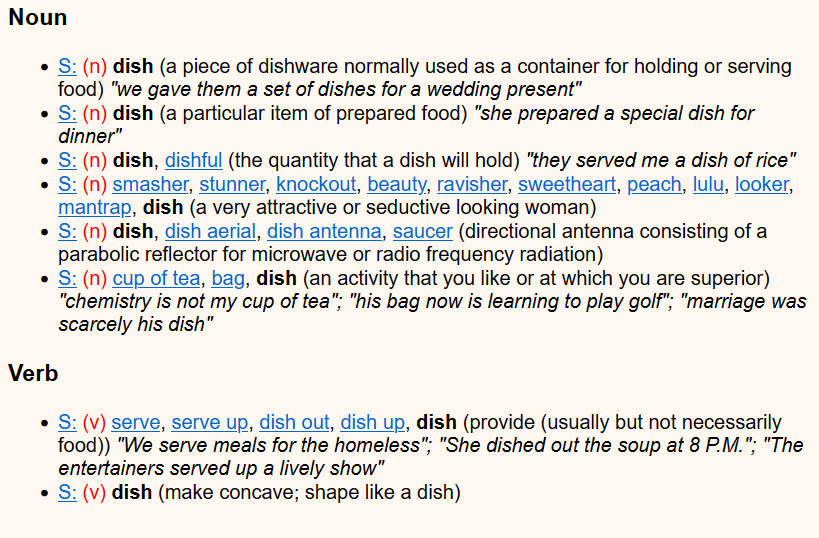

## 2. Отримайте визначення та приклад використання леми третього іменника та першого синсету дієслова слова «dish».

In [ ]:
print(wn.synset('dish.n.03').definition())
print(wn.synset('dish.n.03').examples())

the quantity that a dish will hold
['they served me a dish of rice']


In [ ]:
print(wn.synset('dish.v.01').definition())
print(wn.synset('dish.v.01').examples())

provide (usually but not necessarily food)
['We serve meals for the homeless', 'She dished out the soup at 8 P.M.', 'The entertainers served up a lively show']


## 3. Отримайте всі імена, визначення та приклади використання синсетів іменника «dish».

In [ ]:
snsts_n = wn.synsets('dish', wn.NOUN)

for i, snst in enumerate(snsts_n, 1):
  print(f'Synset {i}: {snst.name()}\n')
  print(f'Names: {snst.lemma_names()}')
  print(f'Definition: {snst.definition()}')
  print(f'Examples: {snst.examples()}\n\n')

Synset 1: dish.n.01

Names: ['dish']
Definition: a piece of dishware normally used as a container for holding or serving food
Examples: ['we gave them a set of dishes for a wedding present']


Synset 2: dish.n.02

Names: ['dish']
Definition: a particular item of prepared food
Examples: ['she prepared a special dish for dinner']


Synset 3: dish.n.03

Names: ['dish', 'dishful']
Definition: the quantity that a dish will hold
Examples: ['they served me a dish of rice']


Synset 4: smasher.n.02

Names: ['smasher', 'stunner', 'knockout', 'beauty', 'ravisher', 'sweetheart', 'peach', 'lulu', 'looker', 'mantrap', 'dish']
Definition: a very attractive or seductive looking woman
Examples: []


Synset 5: dish.n.05

Names: ['dish', 'dish_aerial', 'dish_antenna', 'saucer']
Definition: directional antenna consisting of a parabolic reflector for microwave or radio frequency radiation
Examples: []


Synset 6: cup_of_tea.n.01

Names: ['cup_of_tea', 'bag', 'dish']
Definition: an activity that you like o

## 4. Отримайте всі імена, визначення та приклади використання синсетів дієслова «dish».

In [ ]:
snsts_v = wn.synsets('dish', wn.VERB)

for i, snst in enumerate(snsts_v, 1):
  print(f'Synset {i}: {snst.name()}\n')
  print(f'Names: {snst.lemma_names()}')
  print(f'Definition: {snst.definition()}')
  print(f'Examples: {snst.examples()}\n\n')

Synset 1: serve.v.06

Names: ['serve', 'serve_up', 'dish_out', 'dish_up', 'dish']
Definition: provide (usually but not necessarily food)
Examples: ['We serve meals for the homeless', 'She dished out the soup at 8 P.M.', 'The entertainers served up a lively show']


Synset 2: dish.v.02

Names: ['dish']
Definition: make concave; shape like a dish
Examples: []




## 5. Отримайте лему та ім’я даної леми будь-якого синсета слова «dish».

In [ ]:
lemmas = snsts_n[2].lemmas()

print(f'{snsts_n[2]}')
for i, lemma in enumerate(lemmas, 1):
  print(f'Lemma {i}: {lemma} with name {lemma.name()}')

Synset('dish.n.03')
Lemma 1: Lemma('dish.n.03.dish') with name dish
Lemma 2: Lemma('dish.n.03.dishful') with name dishful


## 6. Отримайте всі нижчі та вищі в родовидовій ієрархії WordNet концепти першого синсета іменника «work». Отримайте кореневий гіперонім цього концепту.

In [ ]:
work = wn.synsets('work')[0]

types_of_work = work.hyponyms()
print(types_of_work)
print(work.hypernyms())

[Synset('action.n.10'), Synset('busywork.n.01'), Synset('care.n.01'), Synset('coursework.n.01'), Synset('duty.n.02'), Synset('heavy_lifting.n.01'), Synset('housewifery.n.01'), Synset('housework.n.01'), Synset('investigation.n.02'), Synset('ironing.n.02'), Synset('job.n.06'), Synset('job.n.07'), Synset('labor.n.02'), Synset('logging.n.01'), Synset('loose_end.n.01'), Synset('mission.n.04'), Synset('nightwork.n.01'), Synset('operation.n.07'), Synset('paperwork.n.01'), Synset('service.n.01'), Synset('shining.n.01'), Synset('spadework.n.01'), Synset('subbing.n.01'), Synset('timework.n.01'), Synset('undertaking.n.01'), Synset('wash.n.02'), Synset('welfare_work.n.01')]
[Synset('activity.n.01')]


In [ ]:
import networkx as nx

Work hypernyms:
activity.n.01


Work root hypernym:
entity.n.01




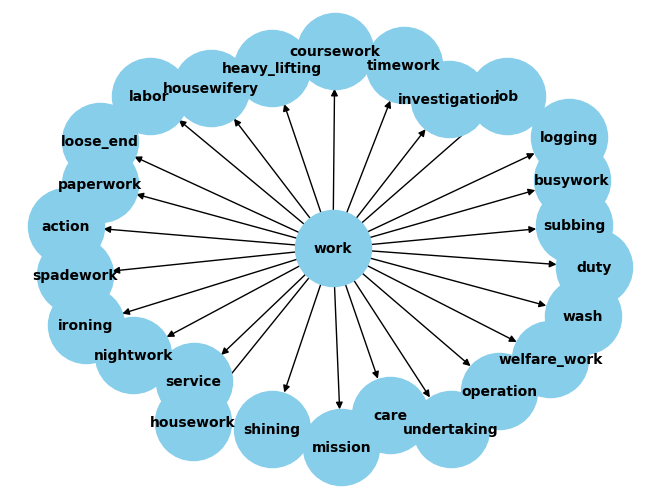

In [ ]:
def get_tree(word):
    G = nx.DiGraph()
    synsets = wn.synsets(word)
    if synsets:
        synset = synsets[0]
        for hyponym in synset.hyponyms():
            G.add_edge(word, hyponym.name().split('.')[0])
    return G

def plot_tree(G):
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=10, font_weight="bold")
    plt.show()

word = "work"

tree = get_tree(word)

print('Work hypernyms:')
for hypernym in wn.synsets(word)[0].hypernyms():
  print(f'{hypernym.name()}\n\n')

print('Work root hypernym:')
for hypernym in wn.synsets(word)[0].root_hypernyms():
  print(f'{hypernym.name()}\n\n')

plot_tree(tree)

## 7. За допомогою WordNet визначте, з яких речовин складається «wood» (використовуйте першу лему іменника цього слова), і частиною яких речовин воно є. Наведіть скріншот з сайту словника WordNet, що підтверджує правильність отриманого результату.

In [ ]:
wood = wn.synsets('wood')[0]
meronyms = wood.substance_meronyms()
holonyms = wood.substance_holonyms()

for meronym in meronyms:
  print(f'Meronym {meronym.lemma_names()} - definition: {meronym.definition()}')

for holonym in holonyms:
  print(f'Holonym {holonym.lemma_names()} - definition: {holonym.definition()}')

Meronym ['lignin'] - definition: a complex polymer; the chief constituent of wood other than carbohydrates; binds to cellulose fibers to harden and strengthen cell walls of plants
Holonym ['beam'] - definition: long thick piece of wood or metal or concrete, etc., used in construction
Holonym ['chopping_block'] - definition: a steady wooden block on which food can be cut or diced or wood can be split
Holonym ['lumber', 'timber'] - definition: the wood of trees cut and prepared for use as building material
Holonym ['spindle'] - definition: a piece of wood that has been turned on a lathe; used as a baluster, chair leg, etc.


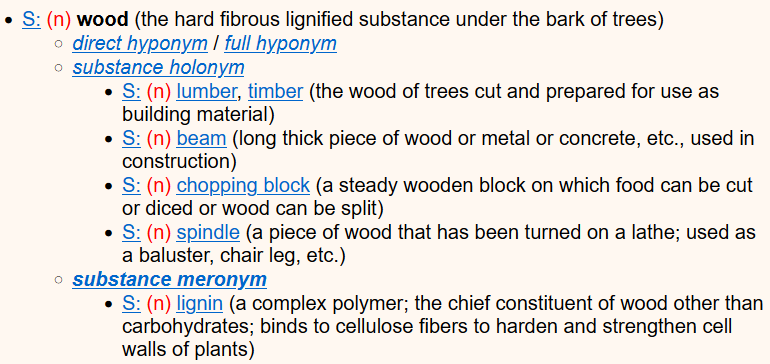

## 8. Отримайте антонім поняття «horizontal». Наведіть скріншот із сайту словника WordNet, що підтверджує правильність отриманого результату.

In [ ]:
lemmas = wn.synset('horizontal.a.01').lemmas()

for lemma in lemmas:
  print(f'Antonyms for {lemma.name()} is')
  for i, antonym in enumerate(lemma.antonyms(), 1):
    print(f'{i}: {antonym.name()}')

Antonyms for horizontal is
1: vertical
2: inclined


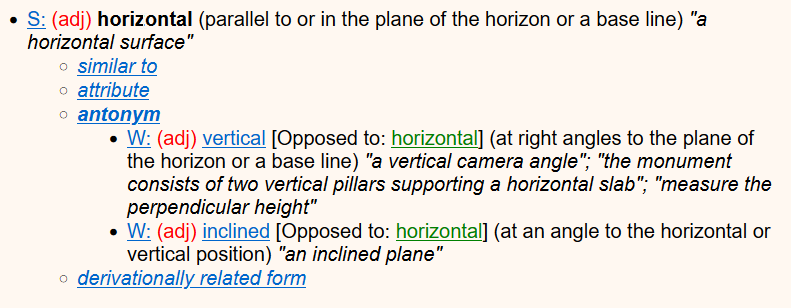

## 9. Покажіть, які дії залучені до поняття «eat».######

In [ ]:
print('Eat enatailments:')
for i, entailment in enumerate(wn.synset('eat.v.01').entailments(), 1):
  print(f'Entailment {i}: {entailment.name()}')

Eat enatailments:
Entailment 1: chew.v.01
Entailment 2: swallow.v.01


## 10. Знайдіть найменший загальний гіпонім синсетів ‘bowl.n.02’ та ‘polyhedron.n.01’

In [ ]:
print(wn.synset('bowl.n.02').lowest_common_hypernyms(wn.synset('polyhedron.n.01')))

[Synset('solid.n.03')]


## 11. Знайдіть найменший загальний гіпонім синсетів ‘bowl.n.01’ і ‘polyhedron.n.01’

In [ ]:
print(wn.synset('bowl.n.01').lowest_common_hypernyms(wn.synset('polyhedron.n.01')))

[Synset('entity.n.01')]


## 12. В чому різниця результатів 10 та 11 пунктів завдання?

In [ ]:
print(f'bowl.n.01: {wn.synset("bowl.n.01").definition()}')
print(f'bowl.n.02: {wn.synset("bowl.n.02").definition()}')

bowl.n.01: a round vessel that is open at the top; used chiefly for holding food or liquids
bowl.n.02: a concave shape with an open top


## 13. Визначте семантичну відстань між синсетами job.n.07 та work.n.01

In [ ]:
def semantic_length(w1, w2):
  return wn.synset(w1).path_similarity(wn.synset(w2))

In [ ]:
synset = ['job.n.07', 'work.n.01', 'entity.n.01']

In [ ]:
print(f'Семантична відстань між {synset[0]} та {synset[1]}: {semantic_length(synset[0], synset[1])}')

Семантична відстань між job.n.07 та work.n.01: 0.5


## 14. Визначте семантичну відстань між синсетами job.n.07 та job.n.07

In [ ]:
print(f'Семантична відстань між {synset[0]} та {synset[0]}: {semantic_length(synset[0], synset[0])}')

Семантична відстань між job.n.07 та job.n.07: 1.0


## 15. Визначте семантичну відстань між синсетами job.n.07 та entity.n.01

In [ ]:
print(f'Семантична відстань між {synset[0]} та {synset[2]}: {semantic_length(synset[0], synset[2])}')

Семантична відстань між job.n.07 та entity.n.01: 0.125


# Practice 6

## 1. Розділити розмічений корпус corpus.treebank на train corpus та test corpus. Перший – 90% від цілого корпусу, а другий, відповідно – 10%.

In [ ]:
nltk.download('treebank')

sentences = treebank.tagged_sents()

[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Package treebank is already up-to-date!


In [ ]:
train_corpus, test_corpus = train_test_split(sentences, test_size=0.1, random_state=42)

## 2. На базі train corpus створіть тегер за замовчуванням, unigram tagger,біграмний тегер та комбінований тегер.

In [ ]:
default_tagger = DefaultTagger('NN')

unigram_tagger = UnigramTagger(train_corpus)

bigram_tagger = BigramTagger(train_corpus)

In [ ]:
unigram_tagger_comb = UnigramTagger(train_corpus, backoff=default_tagger)
bigram_tagger_comb = BigramTagger(train_corpus, backoff=unigram_tagger_comb)

## 3. Порівняйте точність даних тегерів.

In [ ]:
accuracies = []

In [ ]:
default = default_tagger.accuracy(test_corpus)
accuracies.append({'Default': default})
print(default)

0.13733151006055871


In [ ]:
unigram = unigram_tagger.accuracy(test_corpus)
accuracies.append({'Unigram': unigram})
print(unigram)

0.8903106075405353


In [ ]:
bigram = bigram_tagger.accuracy(test_corpus)
accuracies.append({'Bigram': bigram})
print(bigram)

0.17444813440125023


In [ ]:
comb = bigram_tagger_comb.accuracy(test_corpus)
accuracies.append({'Combined': comb})
print(comb)

0.9098456729830044


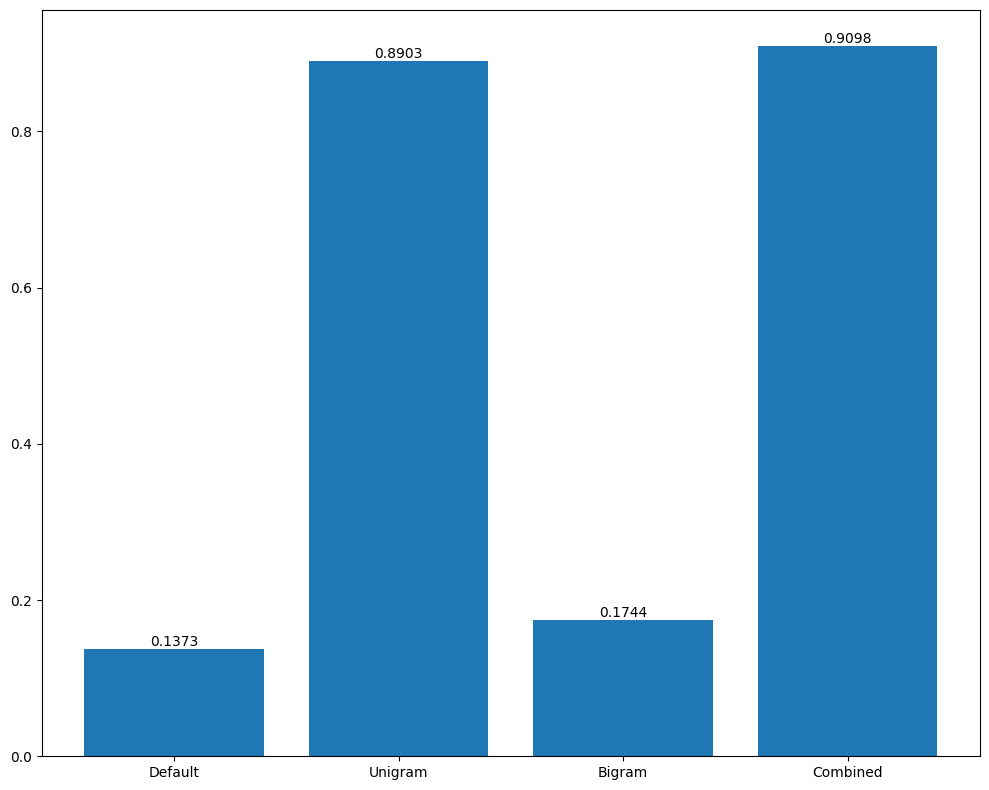

In [ ]:
labels = [list(d.keys())[0] for d in accuracies]
values = [list(d.values())[0] for d in accuracies]

x = np.arange(len(labels))

fig, axs = plt.subplots(1, 1, figsize=(10, 8))

bars = axs.bar(x, values, label='Values')
axs.set_xticks(x)
axs.set_xticklabels(labels)
axs.bar_label(bars, fmt='{:.4f}')
plt.tight_layout()
plt.show()

## 4. Порівняйте точність даних тегерів з аналогічними, створеними на базі навчального корпусу 90% brown corpus, категорії fiction.

In [ ]:
nltk.download('brown')
nltk.download('punkt')
from nltk.corpus import brown

brown_tagged_sents=brown.tagged_sents(categories='fiction')

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
train_corpus_brown, test_corpus_brown = train_test_split(brown_tagged_sents, test_size=0.1, random_state=42)

In [ ]:
default_tagger_brown = DefaultTagger('NN')

unigram_tagger_brown = UnigramTagger(train_corpus_brown)

bigram_tagger_brown = BigramTagger(train_corpus_brown)

In [ ]:
unigram_tagger_comb_brown = UnigramTagger(train_corpus_brown, backoff=default_tagger_brown)
bigram_tagger_comb_brown = BigramTagger(train_corpus_brown, backoff=unigram_tagger_comb_brown)

In [ ]:
accuracies_brown = []

In [ ]:
default_brown = default_tagger_brown.accuracy(test_corpus_brown)
accuracies_brown.append({'Default': default_brown})
print(default_brown)

0.1172318339100346


In [ ]:
unigram_brown = unigram_tagger_brown.accuracy(test_corpus_brown)
accuracies_brown.append({'Unigram': unigram_brown})
print(unigram_brown)

0.840553633217993


In [ ]:
bigram_brown = bigram_tagger.accuracy(test_corpus_brown)
accuracies_brown.append({'Bigram': bigram_brown})
print(bigram_brown)

0.04968858131487889


In [ ]:
comb_brown = bigram_tagger_comb_brown.accuracy(test_corpus_brown)
accuracies_brown.append({'Combined': comb_brown})
print(comb_brown)

0.8725259515570934


In [ ]:
print(accuracies_brown)

[{'Default': 0.1172318339100346}, {'Unigram': 0.840553633217993}, {'Bigram': 0.04968858131487889}, {'Combined': 0.8725259515570934}]


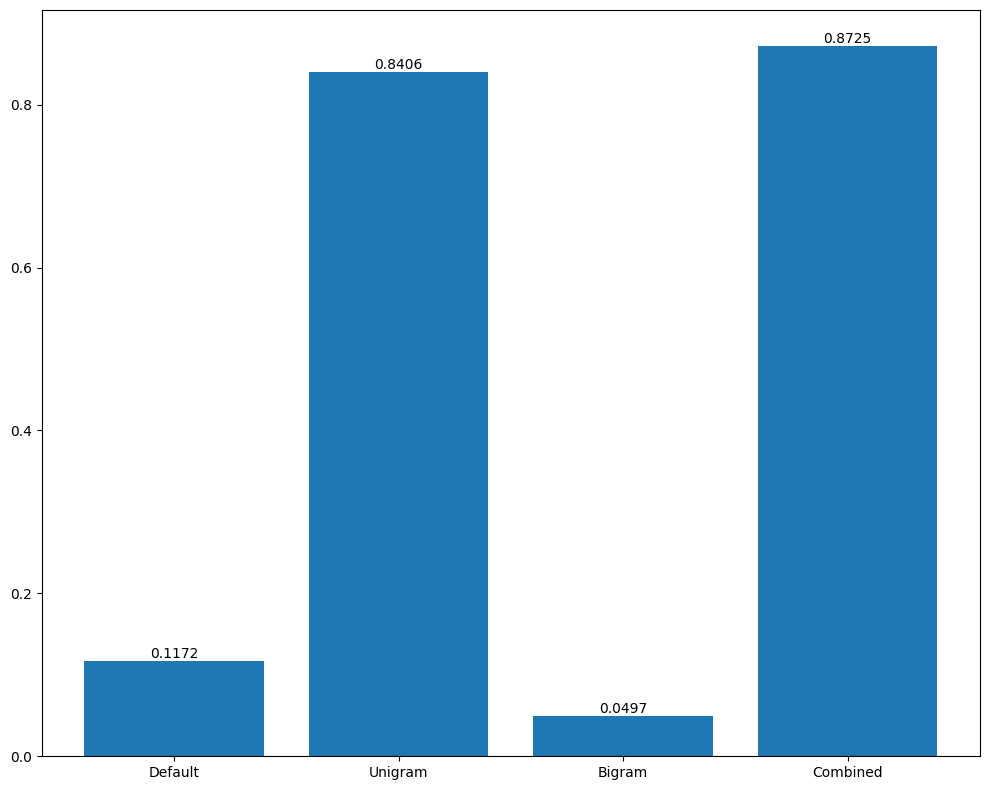

In [ ]:
labels = [list(d.keys())[0] for d in accuracies_brown]
values = [list(d.values())[0] for d in accuracies_brown]

x = np.arange(len(labels))

fig, axs = plt.subplots(1, 1, figsize=(10, 8))

bars = axs.bar(x, values, label='Values')
axs.set_xticks(x)
axs.set_xticklabels(labels)
axs.bar_label(bars, fmt='{:.4f}')

plt.tight_layout()
plt.show()

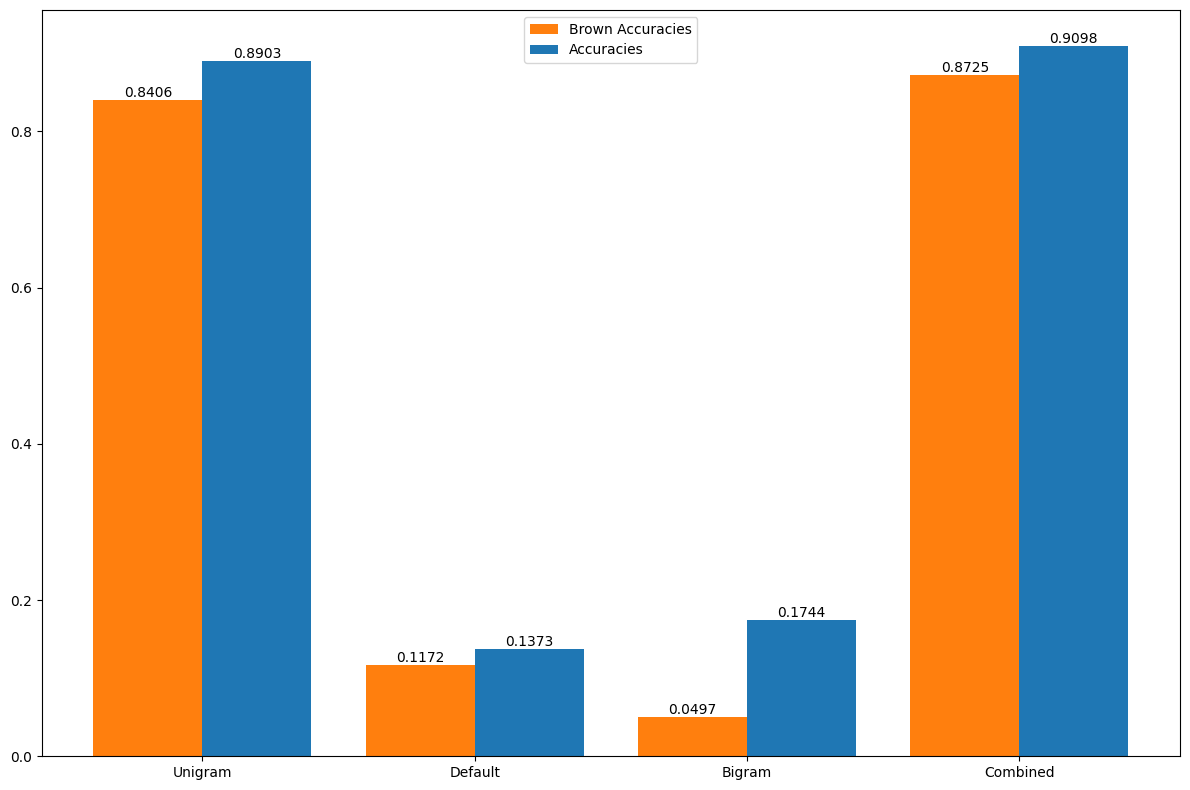

In [ ]:
labels_brown = [list(d.keys())[0] for d in accuracies_brown]
values_brown = [list(d.values())[0] for d in accuracies_brown]

labels = [list(d.keys())[0] for d in accuracies]
values = [list(d.values())[0] for d in accuracies]

all_labels = list(set(labels_brown + labels))
all_values_brown = [values_brown[labels_brown.index(label)] if label in labels_brown else 0 for label in all_labels]
all_values = [values[labels.index(label)] if label in labels else 0 for label in all_labels]

x = np.arange(len(all_labels))

fig, axs = plt.subplots(1, 1, figsize=(12, 8))

bars1 = axs.bar(x - 0.2, all_values_brown, width=0.4, label='Brown Accuracies', color='tab:orange')
bars2 = axs.bar(x + 0.2, all_values, width=0.4, label='Accuracies', color='tab:blue')

axs.set_xticks(x)
axs.set_xticklabels(all_labels)
axs.bar_label(bars1, fmt='{:.4f}')
axs.bar_label(bars2, fmt='{:.4f}')

plt.legend()
plt.tight_layout()
plt.show()

## 5. Створіть текстовий файл англійської мови. Здійсніть його розмітку за допомогою комбінованих тегерів, створених на основі корпусу brown та корпусу treebank. Збережіть результати до файлів та порівняйте.

In [ ]:
text = '''
Harry Potter was a highly unusual boy in many ways. For one thing, he hated the summer holidays more than any other time of year. For another, he really wanted to do his homework but was forced to do it in secret,
in the dead of night. And he also happened to be a wizard.
It was nearly midnight, and he was lying on his stomach in bed, the blankets drawn right over his head like a tent, a flashlight in one hand
and a large leather-bound book (A History of Magic by Bathilda Bagshot) propped open against the pillow. Harry moved the tip of his
eagle-feather quill down the page, frowning as he looked for something that would help him write his essay, "Witch Burning in the Fourteenth Century Was Completely Pointless discuss."
The quill paused at the top of a likely-looking paragraph. Harry Pushed his round glasses up the bridge of his nose, moved his flashlight closer to the book, and read:
Non-magic people (more commonly known as Muggles) were particularly afraid of magic in medieval times, but not very good at recognizing it.
On the rare occasion that they did catch a real witch or wizard, burning had no effect whatsoever. The witch or wizard would perform a basic Flame Freezing Charm and then pretend to shriek with pain while enjoying a gentle, tickling sensation. Indeed, Wendelin the Weird enjoyed being burned so much that she allowed herself to be caught no less than fortyseven times in various disguises.
'''

In [ ]:
tokens = word_tokenize(text)

tags_comb = bigram_tagger_comb.tag(tokens)
tags_comb_brown = bigram_tagger_comb_brown.tag(tokens)

with open("tagged_result_comb.txt", "w") as file:
    for tag1, tag2 in tags_comb:
        file.write(str(tag1) + " " + str(tag2) + "\n")

with open("tagged_result_comb_brown.txt", "w") as file:
    for tag1, tag2 in tags_comb_brown:
        file.write(str(tag1) + " " + str(tag2) + "\n")

for tag1, tag2 in zip(tags_comb, tags_comb_brown):
  print (tag1, tag2)

('Harry', 'NNP') ('Harry', 'NP')
('Potter', 'NN') ('Potter', 'NN')
('was', 'VBD') ('was', 'BEDZ')
('a', 'DT') ('a', 'AT')
('highly', 'RB') ('highly', 'QL')
('unusual', 'JJ') ('unusual', 'JJ')
('boy', 'NN') ('boy', 'NN')
('in', 'IN') ('in', 'IN')
('many', 'JJ') ('many', 'AP')
('ways', 'NNS') ('ways', 'NNS')
('.', '.') ('.', '.')
('For', 'IN') ('For', 'IN')
('one', 'CD') ('one', 'CD')
('thing', 'NN') ('thing', 'NN')
(',', ',') (',', ',')
('he', 'PRP') ('he', 'PPS')
('hated', 'NN') ('hated', 'VBD')
('the', 'DT') ('the', 'AT')
('summer', 'NN') ('summer', 'NN')
('holidays', 'NNS') ('holidays', 'NN')
('more', 'JJR') ('more', 'AP')
('than', 'IN') ('than', 'CS')
('any', 'DT') ('any', 'DTI')
('other', 'JJ') ('other', 'AP')
('time', 'NN') ('time', 'NN')
('of', 'IN') ('of', 'IN')
('year', 'NN') ('year', 'NN')
('.', '.') ('.', '.')
('For', 'IN') ('For', 'IN')
('another', 'DT') ('another', 'DT')
(',', ',') (',', ',')
('he', 'PRP') ('he', 'PPS')
('really', 'RB') ('really', 'RB')
('wanted', 'VBD') ('

In [ ]:
from collections import Counter

# Count the distribution of tags for the first tagger
tag_distribution_comb = Counter(tag for token, tag in tags_comb)

# Count the distribution of tags for the second tagger
tag_distribution_comb_brown = Counter(tag for token, tag in tags_comb_brown)

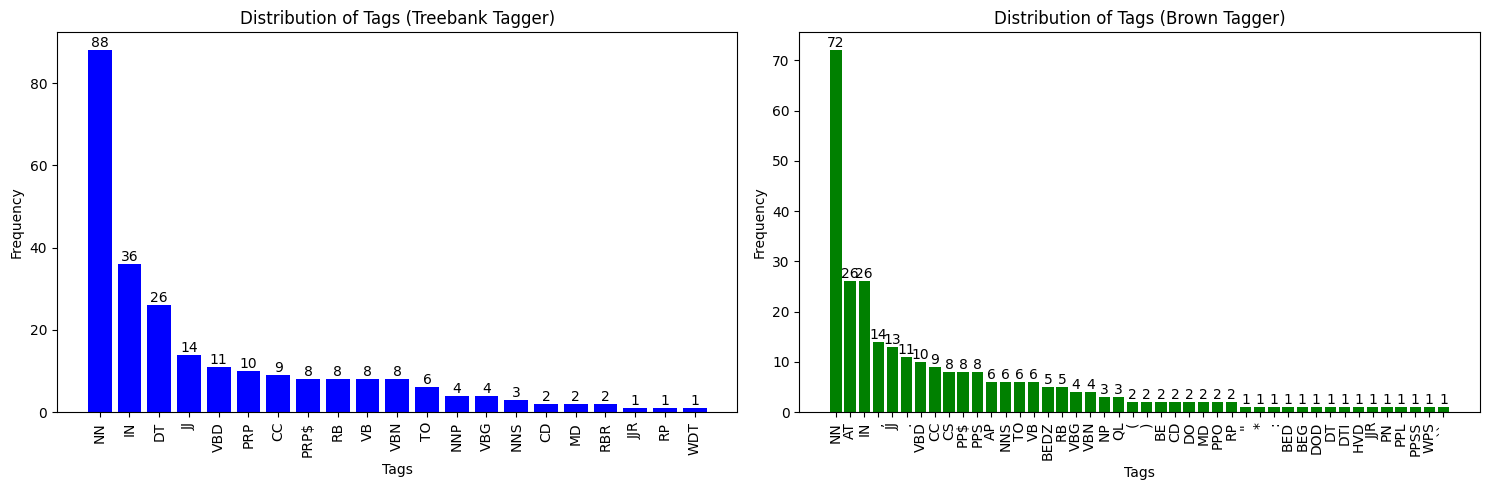

In [ ]:
unique_tags_comb = sorted(set(tag for token, tag in tags_comb if tag is not None))
unique_tags_comb_brown = sorted(set(tag for token, tag in tags_comb_brown if tag is not None))

# Sort tags by frequency
sorted_tags_comb = sorted(unique_tags_comb, key=lambda tag: tag_distribution_comb[tag], reverse=True)
sorted_tags_comb_brown = sorted(unique_tags_comb_brown, key=lambda tag: tag_distribution_comb_brown[tag], reverse=True)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot distribution of tags for the first tagger
bar1 = axes[0].bar(sorted_tags_comb, [tag_distribution_comb[tag] for tag in sorted_tags_comb], color='blue')
axes[0].set_title('Distribution of Tags (Treebank Tagger)')
axes[0].set_xlabel('Tags')
axes[0].set_ylabel('Frequency')
axes[0].tick_params(axis='x', rotation=90)
axes[0].bar_label(bar1)

# Plot distribution of tags for the second tagger
bar2 = axes[1].bar(sorted_tags_comb_brown, [tag_distribution_comb_brown[tag] for tag in sorted_tags_comb_brown], color='green')
axes[1].set_title('Distribution of Tags (Brown Tagger)')
axes[1].set_xlabel('Tags')
axes[1].set_ylabel('Frequency')
axes[1].tick_params(axis='x', rotation=90)
axes[1].bar_label(bar2)

plt.tight_layout()
plt.show()

## 6. Створіть Combining backoff tager на базі TrigramTag для будь-якого навчального корпусу. Оцініть точність його роботи

In [ ]:
nltk.download('treebank')

[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Package treebank is already up-to-date!


True

In [ ]:
sentences = treebank.tagged_sents()

In [ ]:
train_corpus, test_corpus = train_test_split(sentences, test_size=0.1, random_state=42)

In [ ]:
default_tagger = DefaultTagger('NN')
unigram_tagger_comb = UnigramTagger(train_corpus, backoff=default_tagger)
bigram_tagger_comb = BigramTagger(train_corpus, backoff=unigram_tagger_comb)
trigram_tagger_comb = TrigramTagger(train_corpus, backoff=bigram_tagger_comb)

In [ ]:
comb = trigram_tagger_comb.accuracy(test_corpus)
accuracies.append({'Combined': comb})
print(comb)

0.9093572963469427


## 7. Збережіть навчений комбінований тегер, створений на базі treebank корпусу до файлу.

In [ ]:
from _pickle import dump
from _pickle import load

In [ ]:
output = open('trigram.pkl', 'wb')
dump(trigram_tagger_comb, output, -1)

## 8. Використовуйте цей збережений тегер для анотування невеликого англійського тексту.

In [ ]:
text = '''
Harry Potter was a highly unusual boy in many ways. For one thing, he hated the summer holidays more than any other time of year. For another, he really wanted to do his homework but was forced to do it in secret,
in the dead of night. And he also happened to be a wizard.
It was nearly midnight, and he was lying on his stomach in bed, the blankets drawn right over his head like a tent, a flashlight in one hand
and a large leather-bound book (A History of Magic by Bathilda Bagshot) propped open against the pillow. Harry moved the tip of his
eagle-feather quill down the page, frowning as he looked for something that would help him write his essay, "Witch Burning in the Fourteenth Century Was Completely Pointless discuss."
The quill paused at the top of a likely-looking paragraph. Harry Pushed his round glasses up the bridge of his nose, moved his flashlight closer to the book, and read:
Non-magic people (more commonly known as Muggles) were particularly afraid of magic in medieval times, but not very good at recognizing it.
On the rare occasion that they did catch a real witch or wizard, burning had no effect whatsoever. The witch or wizard would perform a basic Flame Freezing Charm and then pretend to shriek with pain while enjoying a gentle, tickling sensation. Indeed, Wendelin the Weird enjoyed being burned so much that she allowed herself to be caught no less than fortyseven times in various disguises.
'''

In [ ]:
input = open('trigram.pkl', 'rb')
tagger = load(input)
input.close()

In [ ]:
tokens = text.split()
tags_tricomb = tagger.tag(tokens)

print(tags_tricomb)

[('Harry', 'NNP'), ('Potter', 'NN'), ('was', 'VBD'), ('a', 'DT'), ('highly', 'RB'), ('unusual', 'JJ'), ('boy', 'NN'), ('in', 'IN'), ('many', 'JJ'), ('ways.', 'NN'), ('For', 'IN'), ('one', 'CD'), ('thing,', 'NN'), ('he', 'PRP'), ('hated', 'NN'), ('the', 'DT'), ('summer', 'NN'), ('holidays', 'NNS'), ('more', 'RBR'), ('than', 'IN'), ('any', 'DT'), ('other', 'JJ'), ('time', 'NN'), ('of', 'IN'), ('year.', 'NN'), ('For', 'IN'), ('another,', 'NN'), ('he', 'PRP'), ('really', 'RB'), ('wanted', 'VBD'), ('to', 'TO'), ('do', 'VB'), ('his', 'PRP$'), ('homework', 'NN'), ('but', 'CC'), ('was', 'VBD'), ('forced', 'VBN'), ('to', 'TO'), ('do', 'VB'), ('it', 'PRP'), ('in', 'IN'), ('secret,', 'NN'), ('in', 'IN'), ('the', 'DT'), ('dead', 'JJ'), ('of', 'IN'), ('night.', 'NN'), ('And', 'CC'), ('he', 'PRP'), ('also', 'RB'), ('happened', 'VBD'), ('to', 'TO'), ('be', 'VB'), ('a', 'DT'), ('wizard.', 'NN'), ('It', 'PRP'), ('was', 'VBD'), ('nearly', 'RB'), ('midnight,', 'NN'), ('and', 'CC'), ('he', 'PRP'), ('was',

In [ ]:
from collections import Counter

tag_distribution_comb = Counter(tag for token, tag in tags_tricomb)

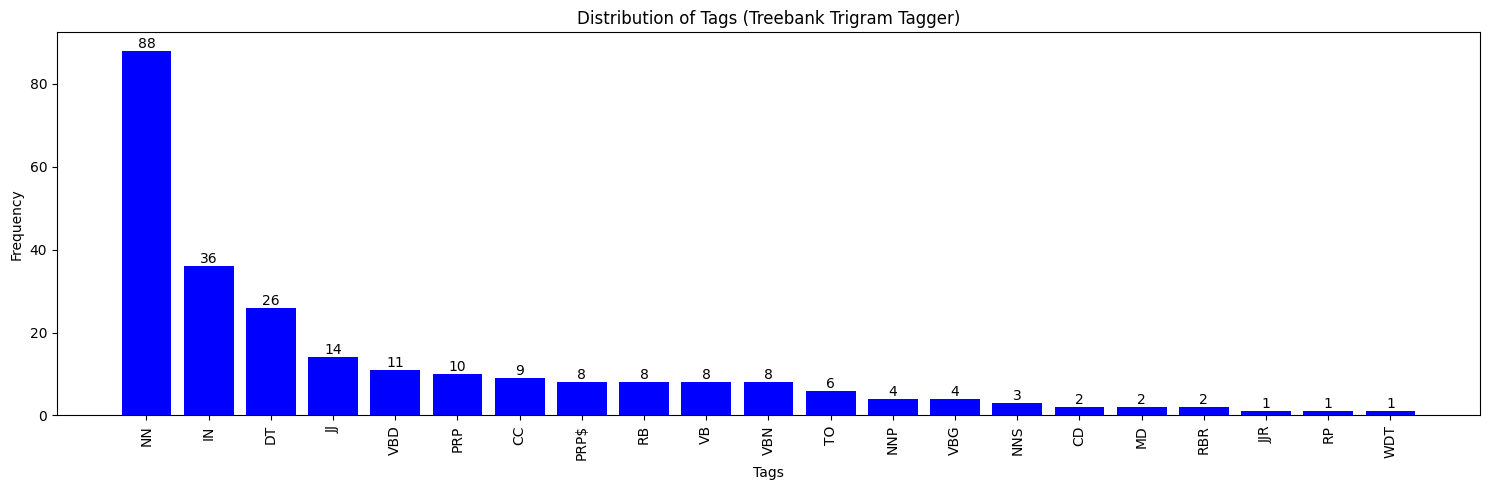

In [ ]:
unique_tags_comb = sorted(set(tag for token, tag in tags_tricomb if tag is not None))

# Sort tags by frequency
sorted_tags_comb = sorted(unique_tags_comb, key=lambda tag: tag_distribution_comb[tag], reverse=True)

fig, axes = plt.subplots(figsize=(15, 5))

# Plot distribution of tags for the first tagger
bar1 = axes.bar(sorted_tags_comb, [tag_distribution_comb[tag] for tag in sorted_tags_comb], color='blue')
axes.set_title('Distribution of Tags (Treebank Trigram Tagger)')
axes.set_xlabel('Tags')
axes.set_ylabel('Frequency')
axes.tick_params(axis='x', rotation=90)
axes.bar_label(bar1)

plt.tight_layout()
plt.show()